# **Loan Default Prediction**

# **Executive Summary**
Loan defaults pose a significant challenge to financial institutions, impacting profitability and credit risk management. This project addresses the issue by developing a machine learning solution to proactively identify high-risk loan applicants at the application stage. Using the Home Equity dataset, a tuned XGBoost model was selected for its superior  recall. Key features driving predictions include Debt-to-Income Ratio (DEBTINC), Delinquency History (DELINQ), and Financial Stability Score, as confirmed through SHAP analysis
# **Problem Summary**
High default rates jeopardize financial institutions, leading to revenue losses and strained borrower-lender relationships. Existing risk assessment methods often lack the granularity required to capture subtle borrower patterns. This project aims to build an interpretable predictive model to flag high-risk applicants, enabling lenders to make informed decisions and mitigate default rates.



# **Solution Design**

During the model building and evaluation phase, several algorithms were tested, including Logistic Regression, Decision Trees, Random Forest and XGBoost.  Logistic Regression fell far behind the other classification models.  However, XGBoost had the best result for the use case.

### Metrics Comparison Table
| Metric                 | Decision Tree Tuned | XGBoost Tuned   | Random Forest Tuned | Better Model            |
|------------------------|---------------------|-----------------|---------------------|-------------------------|
| Accuracy               | 82.4%              | 81.5%           | 85.2%               | Close (Random Forest wins) |
| Weighted F1 Score      | 83.4%              | 82.9%           | 85.7%               | Close (Random Forest wins) |
| Class 0 F1 Score       | 88.2%              | 87.2%           | 90.4%               | Random Forest            |
| Class 1 F1 Score       | 65.3%              | 66.8%           | 67.8%               | Random Forest            |
| Recall (Class 0)       | 83.0%              | 79.5%           | 87.9%               | Random Forest            |
| Recall (Class 1)       | 79.8%              | 89.2%           | 74.7%               | XGBoost                 |
| Precision (Class 0)    | 94.0%              | 97.0%           | 94.0%               | XGBoost (close with Decision Tree) |
| Precision (Class 1)    | 55.0%              | 53.0%           | 55.0%               | Decision Tree (close with Random Forest) |

---

### Why XGBoost is better for prioritizing defaults
- **Superior recall for defaults (Class 1):** XGBoost achieves 89.2% recall, significantly higher than Decision Tree (79.8%) and Random Forest (74.7%). This ensures high-risk borrowers are effectively flagged, reducing financial losses from missed defaults.
  
- **Better handling of false negatives:** XGBoost reduces the likelihood of high-risk borrowers being incorrectly classified as non-defaults, making it ideal for risk-focused use cases.

- **Higher precision for non-defaults (Class 0):** XGBoost delivers 97.0% precision for Class 0, meaning fewer false positives compared to Decision Tree and Random Forest. This improves operational efficiency while maintaining a focus on catching defaults.

- **Flexibility for fine-tuning:** XGBoost’s advanced parameters, such as `scale_pos_weight` and `gamma`, allow optimization specifically for class imbalance, making it even more effective at identifying defaults.

---

### Decision-making factors for prioritizing defaults
1. **Minimizing financial risk:**  
   XGBoost Tuned is the clear choice when missed defaults (Class 1) are the biggest threat to business outcomes. Its 89.2% recall for Class 1 makes it reliable for high-risk scenarios.

2. **Balancing non-default predictions:**  
   While still focused on defaults, XGBoost maintains 97.0% precision for Class 0, ensuring non-default borrowers are correctly classified.

3. **Risk-focused optimization:**  
   XGBoost allows for greater control through advanced parameters, making it easier to tailor the model for financial risk mitigation.

---

### Additional insight: Close accuracy and F1 scores
- **Accuracy:** XGBoost (81.5%) and Decision Tree (82.4%) are close, indicating similar reliability. Random Forest outperforms both at 85.2% but recall is most important.  They are all fairly accurate at above 80%.
  
- **Weighted F1 Score:** XGBoost (82.9%) and Decision Tree (83.4%) are also close, with Random Forest slightly ahead at 85.7%.  They are all above 80%, so all are fairly good.

---

### Recommendation for Implementation
Given that the main focus is on defaults (Class 1), XGBoost Tuned stands out as the superior choice thanks to its exceptional recall, effectively minimizing missed high-risk borrowers. Although Random Forest achieves higher overall accuracy, its lower recall for defaults makes it less suitable for scenarios where identifying defaults is critical. XGBoost also delivers adequate performance in F1 and accuracy, while excelling in the most impactful metric for the task.



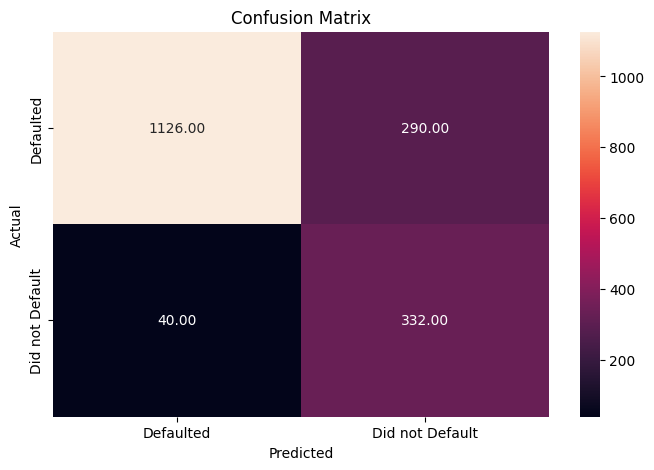

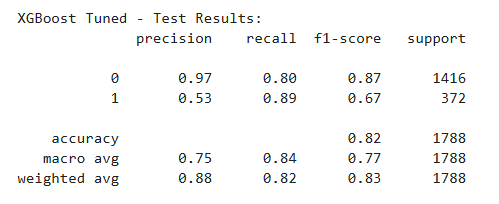

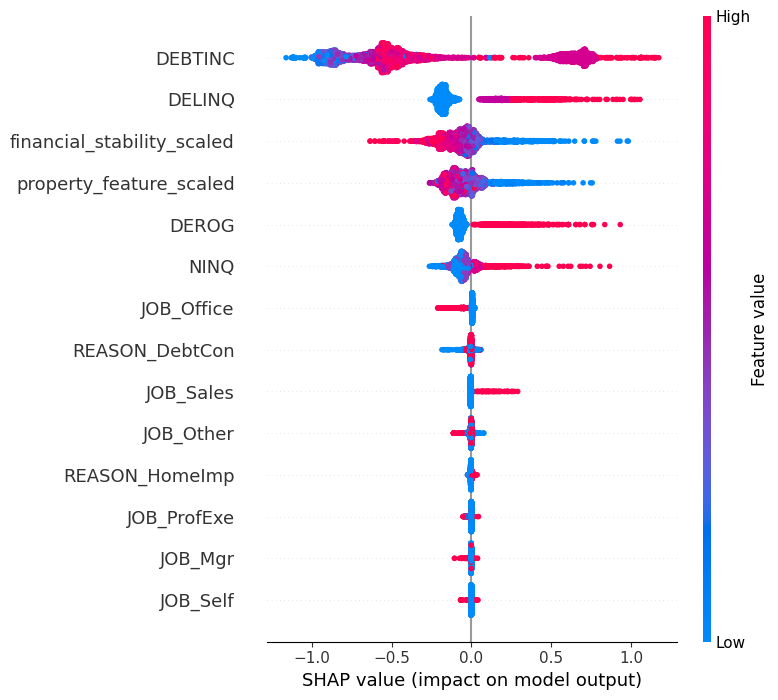

# **Business Insights on Likelihood to Default:**

## Key Predictors and Their Implications:
- **Debt-to-Income Ratio (DEBTINC):**
  - Borrowers with higher DEBTINC are at increased risk of default.
  - **Business Insight**: Introduce targeted interventions such as stricter lending limits for applicants with DEBTINC exceeding a certain threshold (e.g., 50%).

- **Delinquency History (DELINQ):**
  - Past delinquencies strongly predict future defaults.
  - **Business Insight**: Develop loan products tailored to individuals with minor delinquencies but good repayment patterns (e.g., higher interest rates or smaller loan amounts).

- **Financial Stability:**
  - Low financial stability correlates with higher default risk.
  - **Business Insight**: Identify financially unstable borrowers early and offer pre-emptive financial counseling to improve repayment capacity.

- **Property Feature Importance:**
  - Borrowers with properties as assets are relatively more stable.
  - **Business Insight**: Consider lower interest rates or extended loan tenures for applicants with property ownership.


## Strategic Actions:
1. **Applicant Risk Segmentation:**
   - Categorize borrowers into high, medium, and low-risk tiers based on DEBTINC and DELINQ thresholds.
   - **Action**: Automate approval for low-risk applicants and flag high-risk borrowers for enhanced review.

2. **Customized Loan Offers:**
   - Offer reduced loan amounts or collateralized loans for high-risk borrowers.
   - **Action**: Develop "second-chance" products for borderline applicants with adjusted terms.

3. **Portfolio Monitoring:**
   - Track repayment behavior of high-risk applicants closely post-loan issuance.
   - **Action**: Use real-time data integration to flag potential defaults early.

4. **Enhancing Customer Retention:**
   - Provide educational resources to applicants with high DEBTINC to improve financial literacy.
   - **Action**: Engage with borderline applicants through proactive communication and support.




# **Data Overview**
The Home Equity dataset (HMEQ) contains 5,960 records of home equity loans, with 20% (1,189 cases) resulting in defaults.  Total default loan value is 20 million dollars out of 111 millio dollars in total loan value. Key features in the dataset include loan amount (LOAN), mortgage due (MORTDUE), property value (VALUE), delinquency history (DELINQ), and debt-to-income ratio (DEBTINC), among others. Missing values were addressed through estimation, and both skewness and multicollinearity were analyzed and improved.


# **Exploratory Data Analysis (EDA)**
Features such as Loan Amount, Mortgage Due, Property Value, DEROG, DELINQ, and NINQ exhibit positive skewness, with most values concentrated at lower ranges and a few high outliers. In the correlation analysis, strong correlations were observed, particularly between MORTDUE and VALUE (0.76), indicating higher mortgage dues for higher-valued properties. Additionally, DELINQ and DEROG were positively correlated with defaults, emphasizing their predictive significance.

Correlation Matrix:

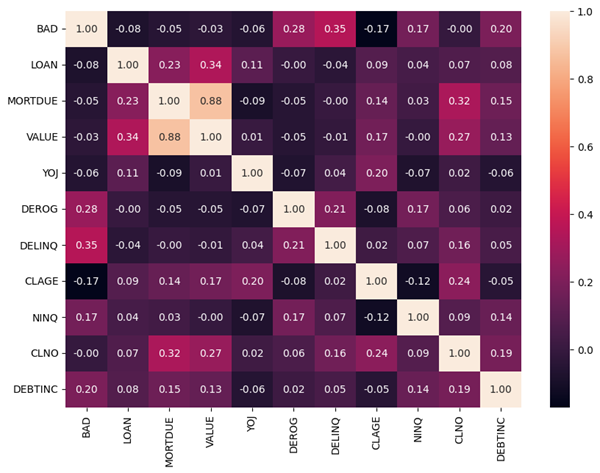

# **Feature Engineering**
To enhance the model's predictive power, several new features were engineered:

* 	Property Stability: A composite feature capturing property-related financial factors. This was calculated using the ratio of property value to mortgage due, offering insight into property equity.

* 	Financial Stability Score: Calculated by multiplying account age and the number of credit lines, providing a holistic measure of borrower stability. This heuristic was chosen based on the assumption that borrowers with longer credit histories and more lines of credit are more financially stable.


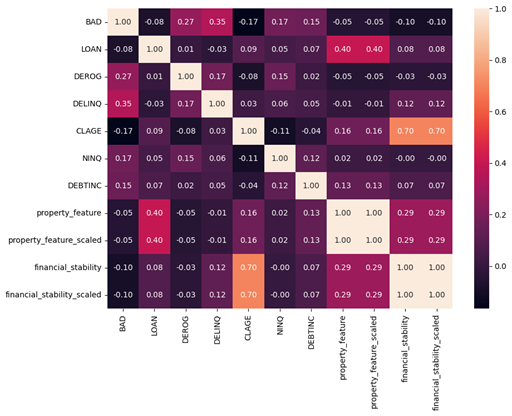

## **Business Observations**

Borrowers flagged as high-risk based on their Debt-to-Income Ratio (DEBTINC) and Delinquency History (DELINQ) profiles should undergo enhanced manual review. SHAP analysis provides clear and transparent explanations of these risk profiles, facilitating effective underwriting decisions.

To address loan defaults, targeted interventions such as stricter lending limits for applicants with Debt-to-Income Ratio (DEBTINC) exceeding a certain threshold should be introduced. Loan products tailored to individuals with minor delinquencies but good repayment patterns, such as higher interest rates, shorter tenures, or smaller loan amounts, should be developed. Financially unstable borrowers should be identified early and offered pre-emptive financial counseling to improve repayment capacity. Additionally, lower interest rates or extended loan tenures should be considered for applicants with property ownership.

## **Limitations and Recommendations for Further Analysis**

Class imbalance may affect the identification of rare default cases. To address this, periodic retraining, exploration of ensemble methods, and feature expansion using open banking data are recommended. Additionally, to counter data drift, periodic retraining and monitoring are necessary to ensure consistent performance over time. Incorporating external data sources, such as open banking information, can further enhance model robustness and accuracy.

## **Recommendations for Implementation**


- **Integration**: Implement the XGBoost model into the loan origination system and set a threshold score to flag high-risk applicants for manual review.
- **Transparency**: Use SHAP dashboards to provide interpretable results to credit analysts.
- **Monitoring**: Conduct quarterly performance evaluations and retrain the model every 6–12 months.
- **User Training**: Provide training sessions for credit analysts and loan officers on how to interpret SHAP analysis results and use the model effectively.
- **Customer Communication**: Develop clear communication strategies to explain loan decisions to applicants, especially those flagged as high-risk, to maintain transparency and trust.
- **Feedback Loop**: Establish a feedback loop where loan officers can provide insights on model performance and suggest improvements based on real-world observations.
- **Regulatory Compliance**: Ensure the model and its implementation comply with all relevant financial regulations and guidelines to avoid legal issues.
- **Pilot Testing**: Conduct a pilot test of the model in a controlled environment before full-scale implementation to identify any potential issues and make necessary adjustments.
- **Data Security**: Implement robust data security measures to protect sensitive borrower information and ensure compliance with data protection regulations.
- **Continuous Improvement**: Set up a dedicated team to continuously monitor model performance, incorporate new data sources, and update the model as needed to maintain its accuracy and relevance.


## **Business Insights**
These strategies not only mitigate risk but also allow lenders to expand their customer base while maintaining portfolio health. Lenders can categorize borrowers into risk tiers based on DEBTINC and DELINQ thresholds:

* Low-Risk: Automate loan approvals for applicants with a low likelihood of default.
* High-Risk: Require enhanced reviews and tailored loan offers (e.g., reduced * loan amounts or additional collateral) for borrowers flagged as high-risk.
Borderline Cases: Develop second-chance products with adjusted terms to ensure fairness while minimizing risk exposure.

# Savings Analysis: XGBoost Metrics

### Data Summary
- **Total Loan Amount:** $110,903,500.00

- **Loans in Default (Class 1):** $20,120,400.00
- **Recall (Class 1):** 89.2%  
  This means the XGBoost model correctly identifies 89.2% of defaults.

---

### Calculations
1. **Defaults Detected by XGBoost**  
   - Formula: `Recall × Loans in Default`  
   - $$20,120,400.00 \times 0.892 = 17,956,768.80$$  
   - The model successfully identifies $17,956,768.80 worth of loans in default.

2. **Missed Defaults**  
   - Formula: `Loans in Default × (1 - Recall)`  
   - $$20,120,400.00 \times (1 - 0.892) = 2,163,631.20$$  
   - The model misses $2,163,631.20 in defaults.

3. **Savings from Detection**  
   - Let’s assume interventions mitigate 50% of detected defaults.  
   - Formula: `Defaults Detected × Mitigation Rate`  
   - $$17,956,768.80 \times 0.5 = 8,978,384.40$$  
   - The XGBoost model generates approximately **$8,978,384.40 in savings** by identifying and mitigating high-risk borrowers.

---

The XGBoost model significantly reduces missed defaults, achieving high recall for defaults (89.2%). Its ability to detect and mitigate defaults translates to substantial savings, depending on the effectiveness of intervention strategies. With adequate intervention, this savings figure could increase further.

### **Continuous Improvement**

Ensuring the model’s accuracy and relevance requires continuous monitoring and improvement, allowing it to adapt to shifting market conditions.

Borrowers face risks like illness, job loss, interest rate changes, inflation, and regulatory updates. Banks must manage operational challenges such as manual errors, technology failures, and bias, as well as natural disasters.

In the tech-driven landscape, banks must address model accuracy, drift, and bias, enhance cybersecurity, and keep pace with fintech innovations. Quick approvals must be balanced with rigorous underwriting, while assessing borrowers without credit history or relying on emerging income sources remains vital. Adapting to economic and regulatory shifts is essential for long-term resilience.




##MILESTONE APPENDIX
## **Problem Definition**

### **Context:**
A bank's consumer credit department seeks to streamline the decision-making process for approving home equity lines of credit. To achieve this, the bank plans to implement the Equal Credit Opportunity Act's guidelines to develop an empirically derived and statistically sound credit scoring model.

This model will utilize data from the existing loan underwriting process for recent applicants who have been granted credit. Importantly, the model must be sufficiently interpretable to provide transparent justifications for adverse decisions, such as loan rejections.

---

### **Objective:**
The goal is to create a classification model that predicts clients who are likely to default on their loans. Additionally, the model should provide actionable insights and recommendations, highlighting the most important features for evaluating loan applications.

---

### **Key Questions:**

#### **Data Exploration**:
- What is the structure of the dataset, and are there missing values?
- Are there relationships between the features and loan defaults? Are there inter-feature relationships such as multicollinearity?

#### **Model Selection**:
- Should preprocessing techniques (e.g., normalization, PCA, or feature engineering) be applied to improve model performance?
- Would methods such as Lasso, Ridge, or PCA help improve results?
- Which model is most appropriate: Logistic Regression, Tuned Decision Tree, Tuned Random Forest, or Boosting?

#### **Insights and Deployment**:
- Do improved metrics justify potential trade-offs, such as overfitting or reduced interpretability?
- What insights do the different models offer, and do their results align?
- Is the model robust and reliable enough for deployment?
- What is the proposed solution design, and what are the associated benefits and costs?

---

### **Problem Formulation:**
- Identify the characteristics most likely to lead to loan default and assess their importance in decision-making.
- Evaluate trade-offs between model performance and interpretability.

---

### **Metric Selection: Recall as the main metric to tune, while also looking at F1 score.**
* Importance of Recall:
Recall for the default class (class 1) is crucial in minimizing financial losses and operational risks associated with loan defaults. By prioritizing recall, the model ensures that most high-risk borrowers are identified, reducing exposure to bad loans.
* Balancing Precision and Recall:
While focusing solely on recall could create an overly strict model that flags too many eligible borrowers as high-risk, resulting in lost revenue and decreased customer satisfaction, balancing it with precision ensures operational and customer-centric effectiveness.
* Role of F1-Score:
The F1-score provides a harmonic mean of precision and recall, helping to optimize the trade-off between missed opportunities and false positives. This balance is important in maintaining lender-borrower relationships while addressing default risks.

### **Key Decision:**
Though both metrics are important, recall takes precedence in this project due to its direct impact on mitigating financial losses and supporting smarter lending decisions.




## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [46]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import PCA
from sklearn.decomposition import PCA

# Algorithms to use
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression, Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import plot_tree

# Metrics and evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

# Additional libraries
import multiprocessing
import shap


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [30]:
#Import csv file with data
customer = pd.read_csv("hmeq.csv")

# Copying data to another variable to avoid any changes to original data
data = customer.copy()

#View the first 5 rows of the data set
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [4]:
#View the last 5 rows of the data set
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [5]:
#View info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


## Summary Statistics

In [6]:
data.describe().T

count           mean           std          min           25%  \
BAD      5960.0       0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.000000  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

# **Observations from Summary Statistics**

**Skewed Data**
* Positive Skewness: Loan Amount, Mortgage Due, Property Value, DEROG, DELINQ, and NINQ show positive skewness, indicating most values are low with a few high outliers.

* Slight Positive Skewness: YOJ and CLAGE are relatively symmetric with mild right-side tails.

* Negative Skewness: DEBTINC is negatively skewed, with most values high and a few low outliers.

* Minimal Skewness: BAD and CLNO are fairly symmetrical.
Variability: Loan Amount and Property Value have wide ranges, indicating diverse financial profiles.

**Outliers**
* Mortgage Due: Large range but moderately concentrated around the mean, with some outliers.

* Age of Credit Line: Contains extreme outliers, but most values are within a realistic range.

* Debt-to-Income Ratio: Mean around 33.78%, with extreme outliers up to 203.31%.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

**Range of Loan Amount:**

* Minimum: 1,100
* Maximum: 89,900

**Distribution of Years at Present Job (YOJ):**

* Range: 0 to 41 years
* Median: 7 years
* Positive skewness indicates more applicants have fewer years of job tenure.

**Unique Categories in REASON Variable:**

* HomeImp
* DebtCon

**Most Common Category in JOB Variable:**

* Other followed by ProfEx (individual category).

**Relationship Between REASON and Default Rate:**

* DebtCon loans: 81.03% repayment rate
* HomeImp loans: 77.75% repayment rate
* Debt consolidation shows slightly better financial stability.
* Loan Amount Differences Between Defaulters and Non-Defaulters:

**Correlation between LOAN and BAD:**
*  -0.14 (slightly negative)
* Lower loan amounts might weakly correlate with defaulting.

**Correlation Between Property Value and Loan Default Rate:**

* Weak correlation between VALUE and BAD.
* Deeper analysis could explore nonlinear patterns.

**Mortgage Amount Differences Between Defaulters and Non-Defaulters:**

* No strong correlation between MORTDUE and BAD.
* Statistical tests could confirm significant differences.

### **Univariate Analysis**


Column: LOAN
Skew: 2.02


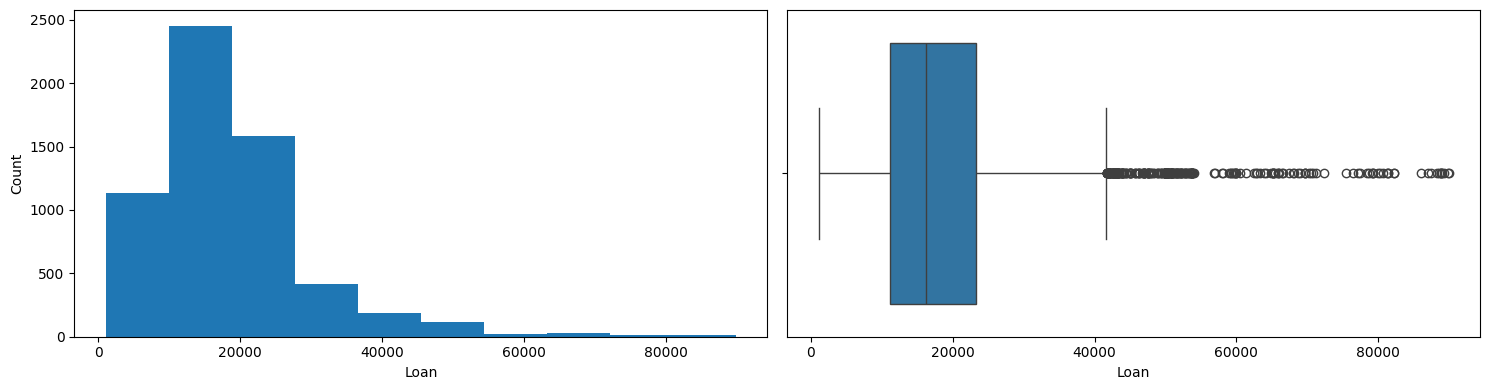

Column: MORTDUE
Skew: 1.81


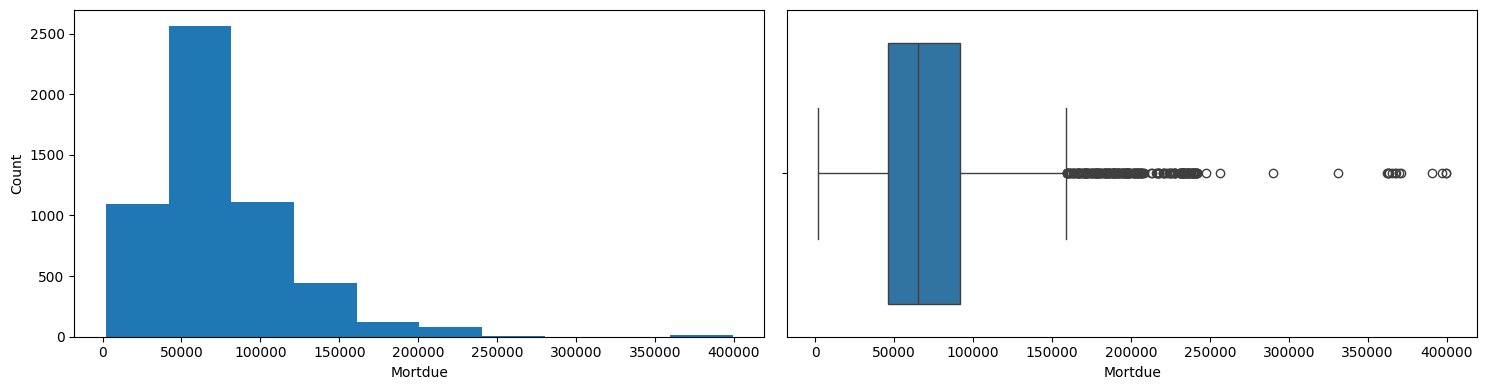

Column: VALUE
Skew: 3.05


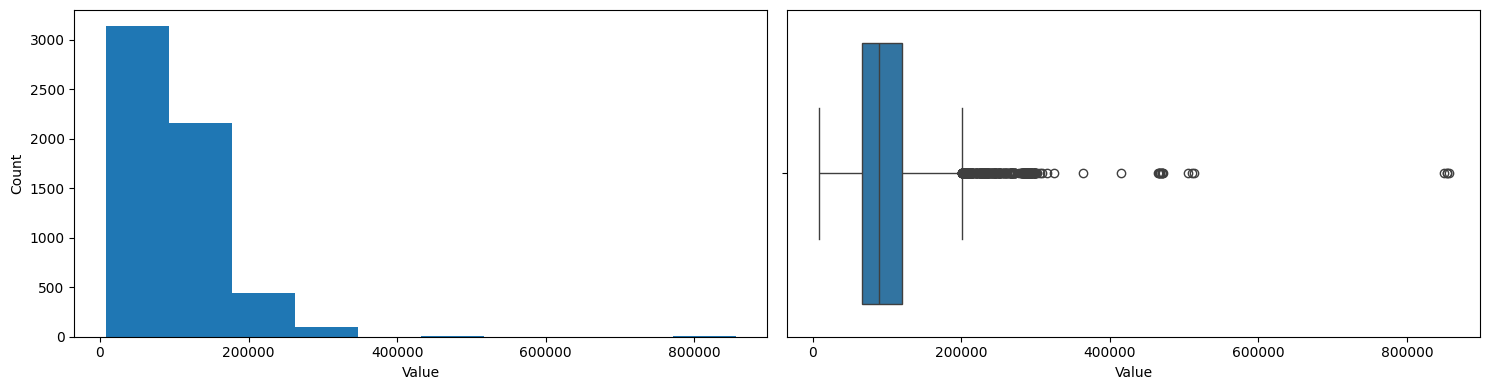

Column: YOJ
Skew: 0.99


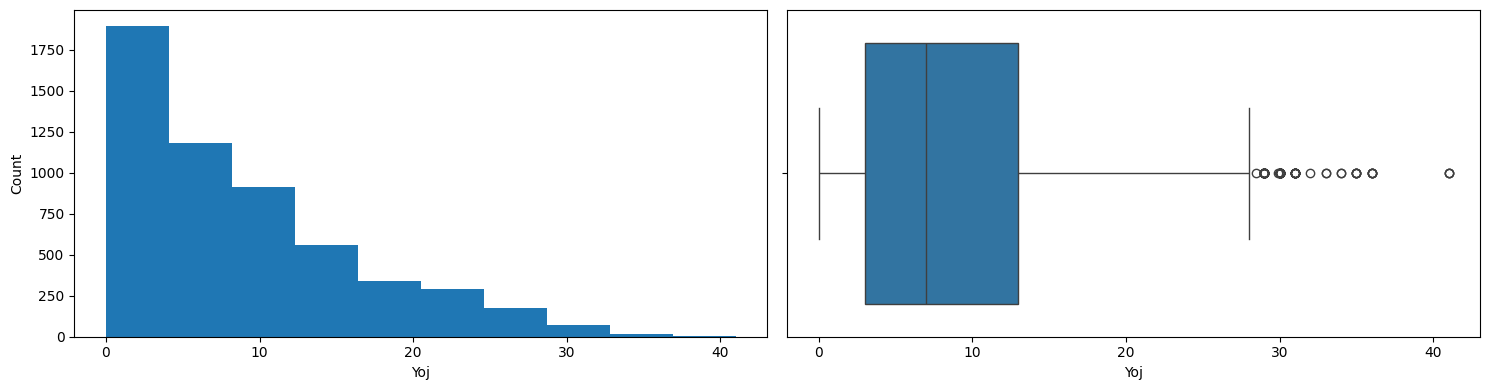

Column: DEROG
Skew: 5.32


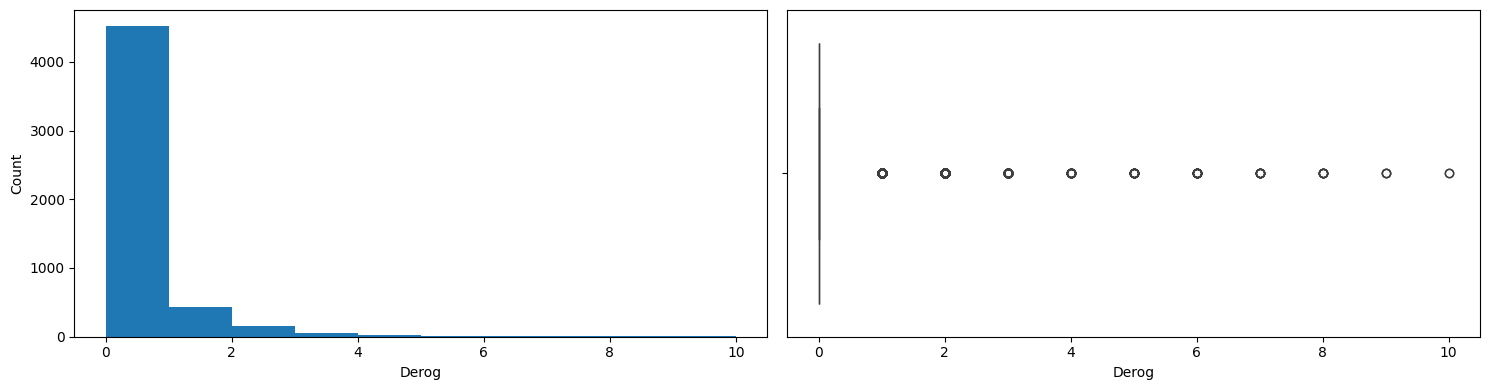

Column: DELINQ
Skew: 4.02


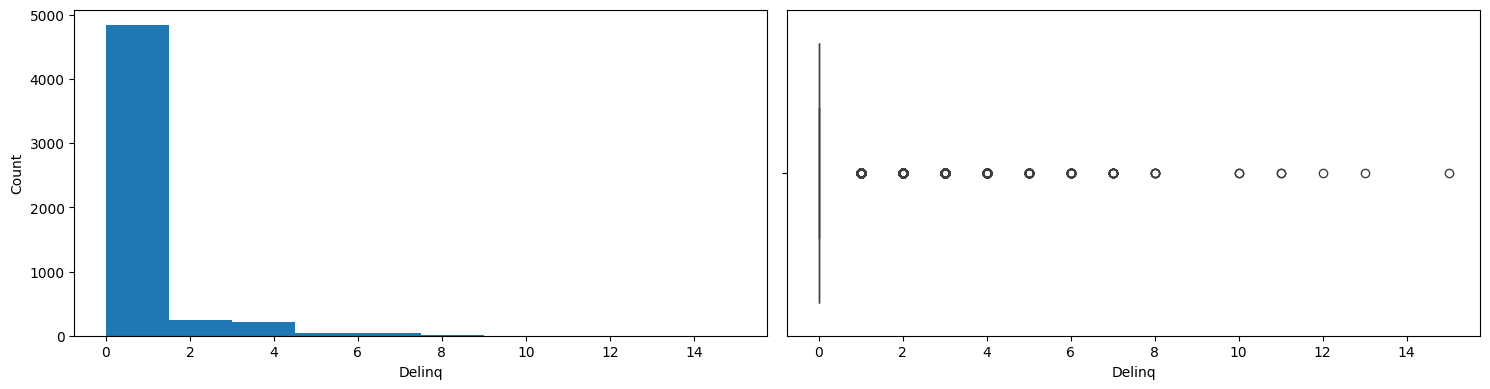

Column: CLAGE
Skew: 1.34


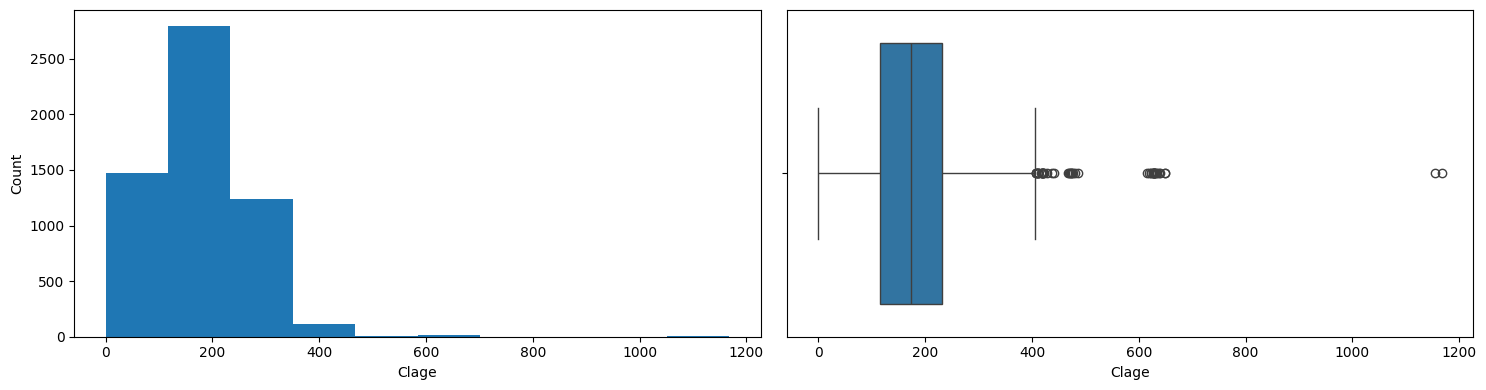

Column: NINQ
Skew: 2.62


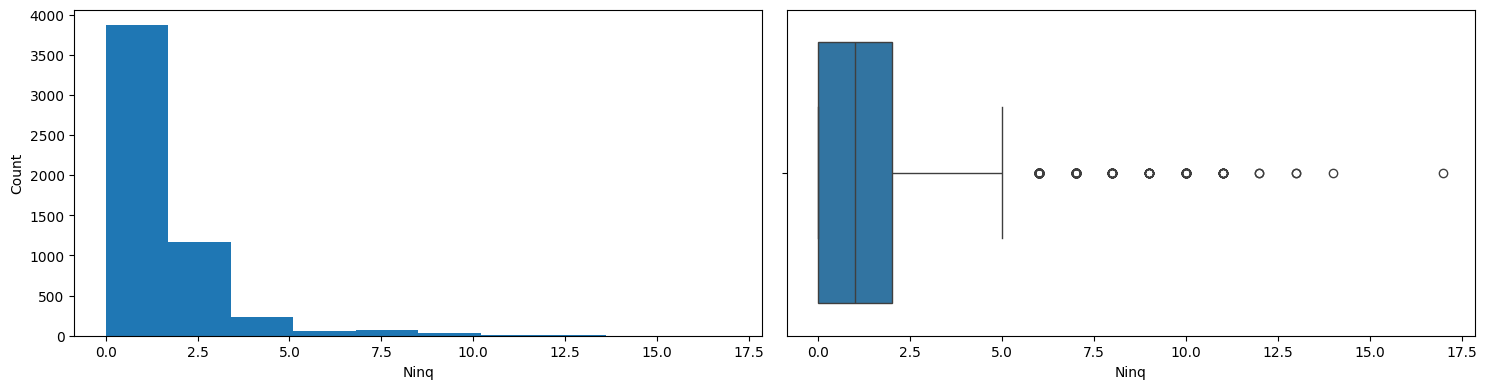

Column: CLNO
Skew: 0.78


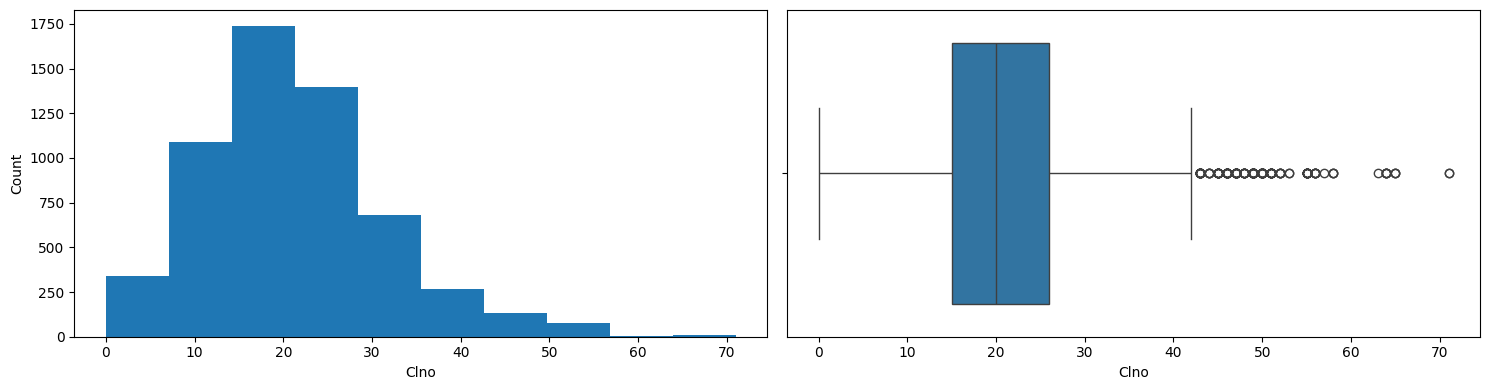

Column: DEBTINC
Skew: 2.85


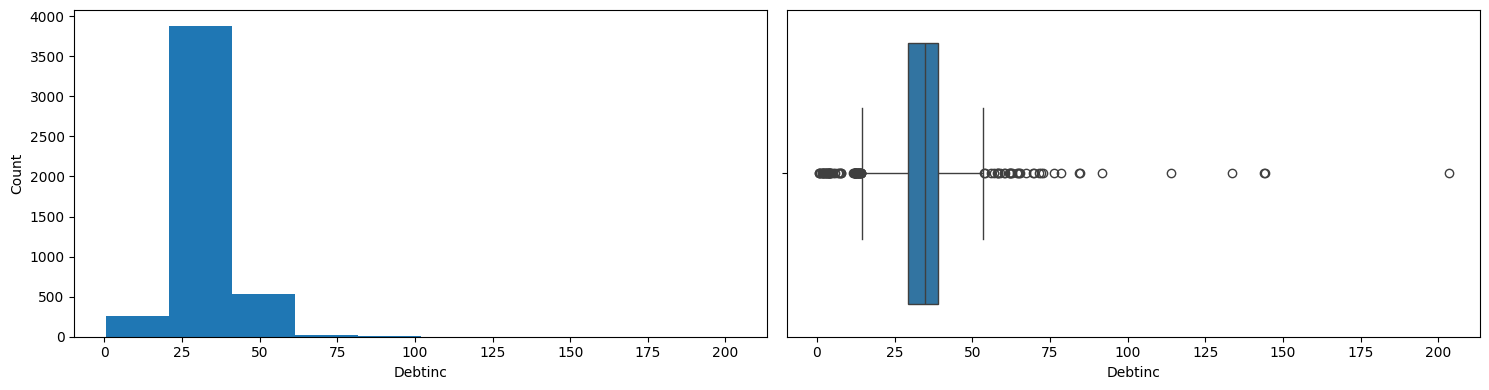

In [7]:
# Automatically iterate over numeric columns excluding 'BAD'
numeric_cols = [col for col in data.select_dtypes(include=['number']).columns if col != 'BAD']

# Loop through each numeric column
for col in numeric_cols:
    print(f"Column: {col}")
    print(f"Skew: {round(data[col].skew(), 2)}")

    # Set up the figure
    plt.figure(figsize=(15, 4))

    # Histogram plot
    plt.subplot(1, 2, 1)
    data[col].hist(bins=10, grid=False)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.xlabel(col.capitalize())

    plt.tight_layout()  # Ensures plots don't overlap
    plt.show()

### **Bivariate Analysis**

In [8]:
# Dynamically identify categorical columns in the dataset
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Extend functionality to include 'BAD' or any other column names that may need to be treated as categorical
custom_categorical_columns = ['BAD']  # Add specific columns to treat as categorical
for custom_col in custom_categorical_columns:
    if custom_col in data.columns:
        cat_cols.append(custom_col)

# Ensure no duplicates in the list of categorical columns
cat_cols = list(set(cat_cols))

# Iterate through categorical columns
for col in cat_cols:
    try:
        print(data[col].value_counts(normalize=True))  # Display percentage of each category
        print('*' * 40)
    except Exception as e:
        print(f"Error processing column '{col}': {e}")

JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
****************************************
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
****************************************
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
****************************************


# **Key insights from the data**

 **JOB:**
- Other: 42.03%
- ProfExe: 22.46%
- Office: 16.69%
- Smaller groups: Mgr, Self, Sales

**BAD:**
- Non-default loans: 80.05%
- Default loans: 19.95%
- Class imbalance may need addressing

**REASON:**
- Debt consolidation: 68.82%
- Home improvement: 31.18%

**Conclusion:**
- Tailored strategies based on job types
- Addressing default patterns
- Optimizing analysis based on loan purposes

### **Multivariate Analysis**

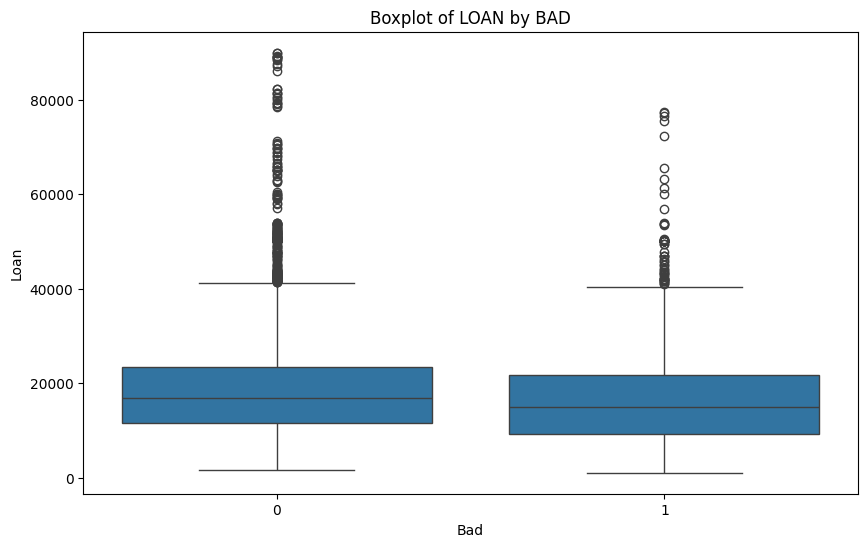

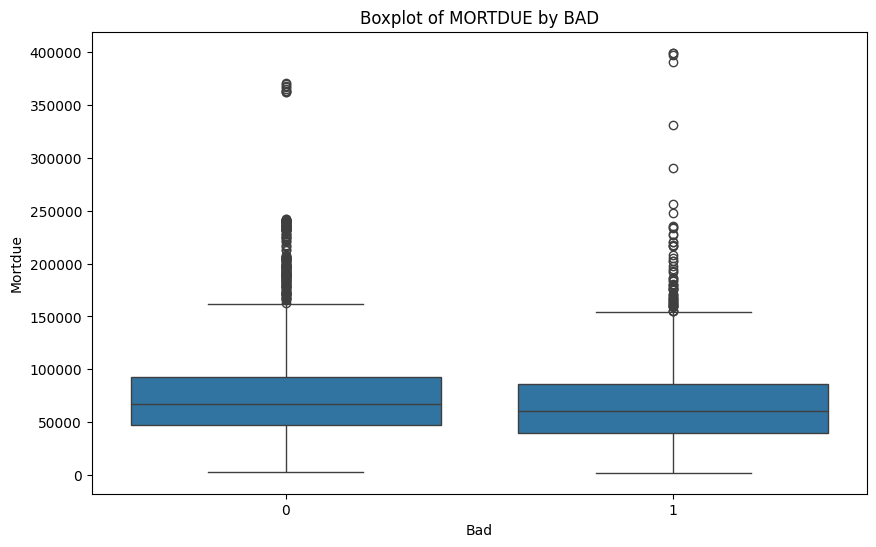

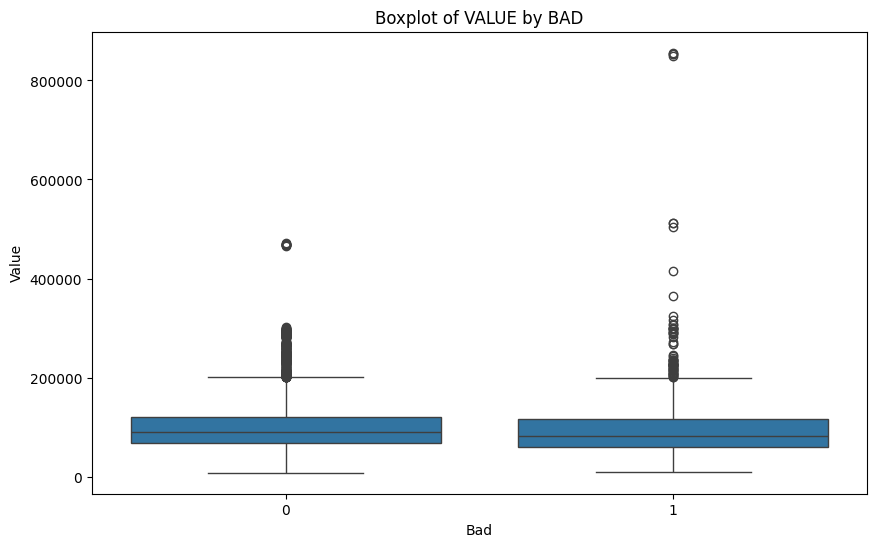

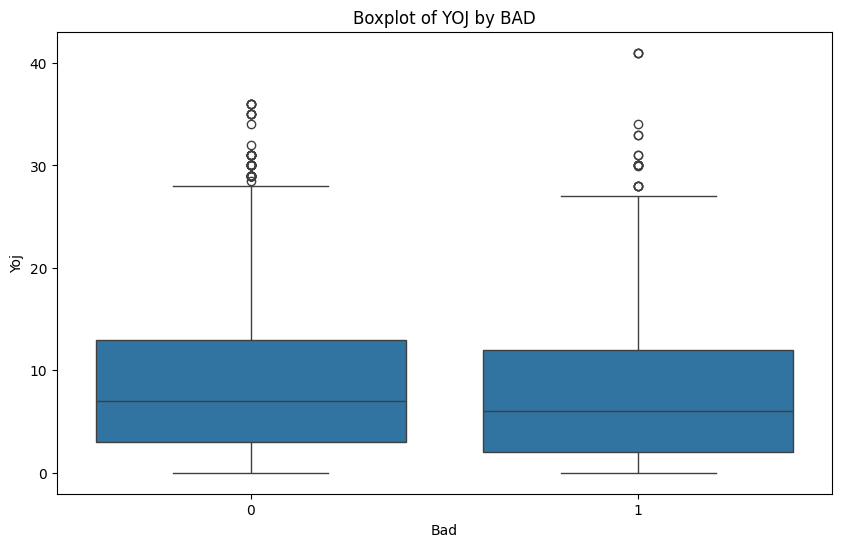

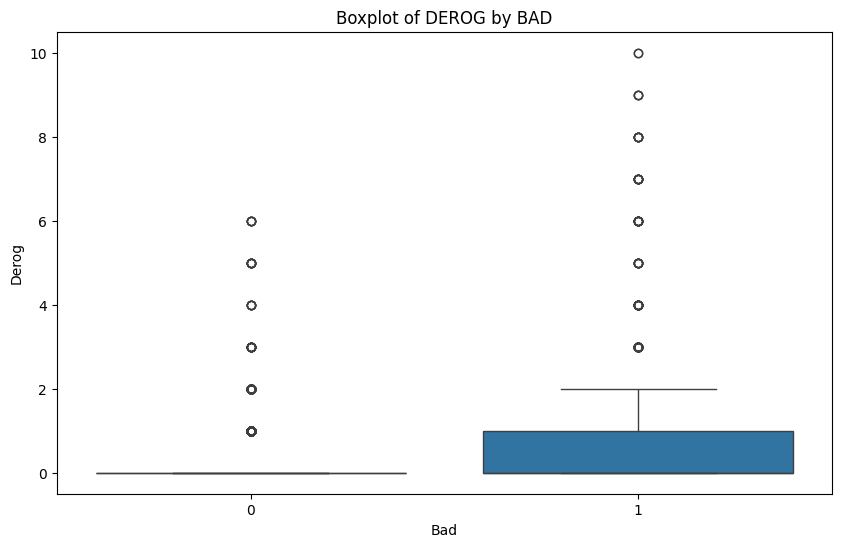

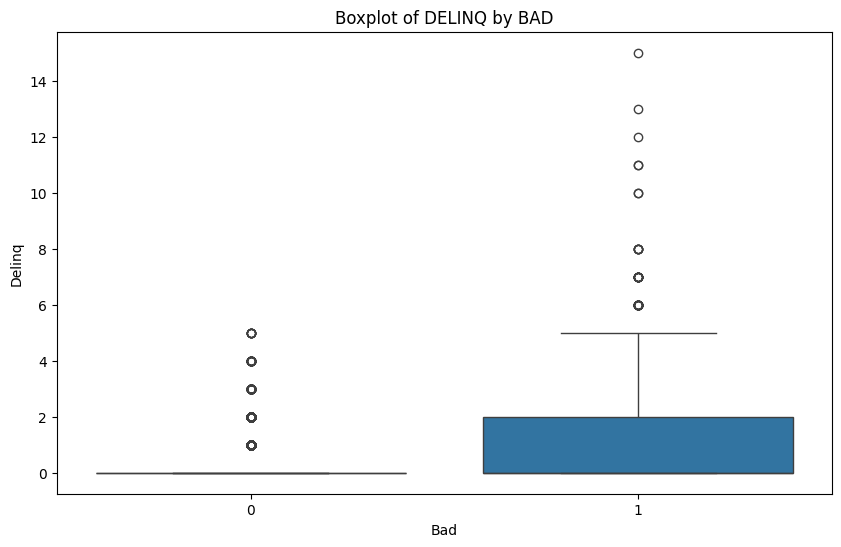

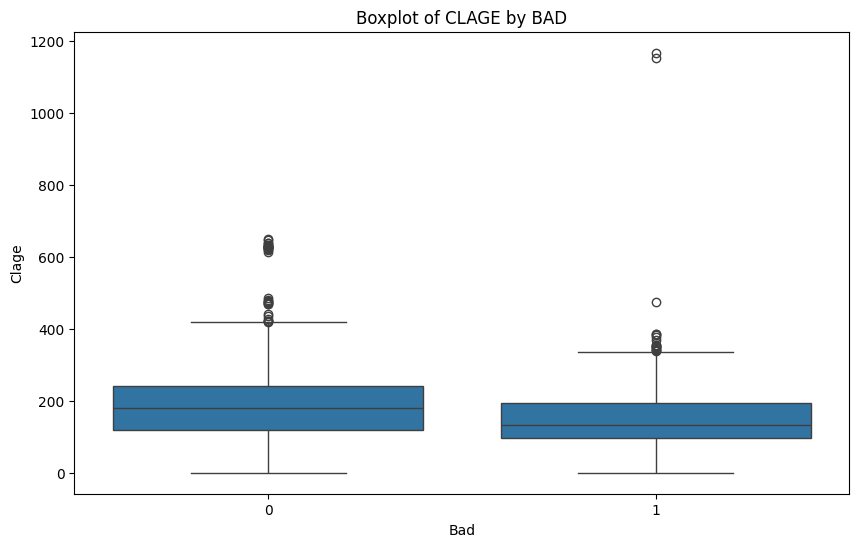

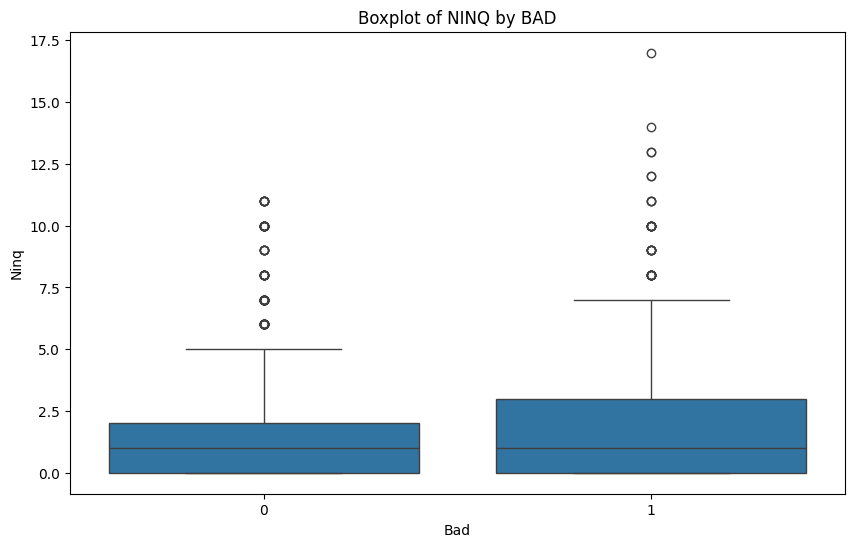

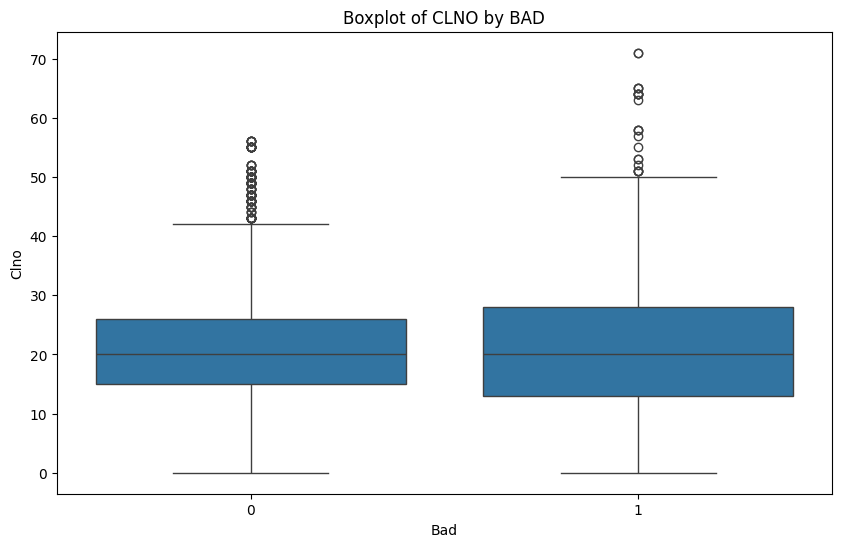

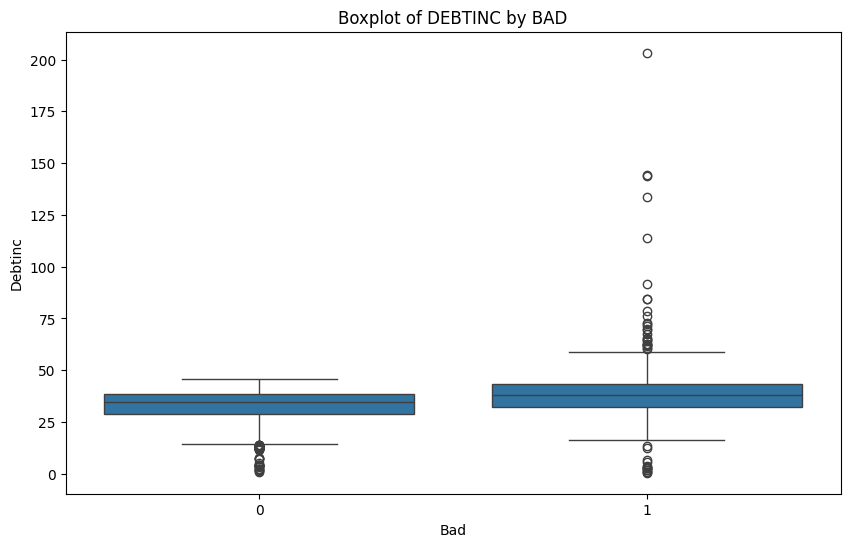

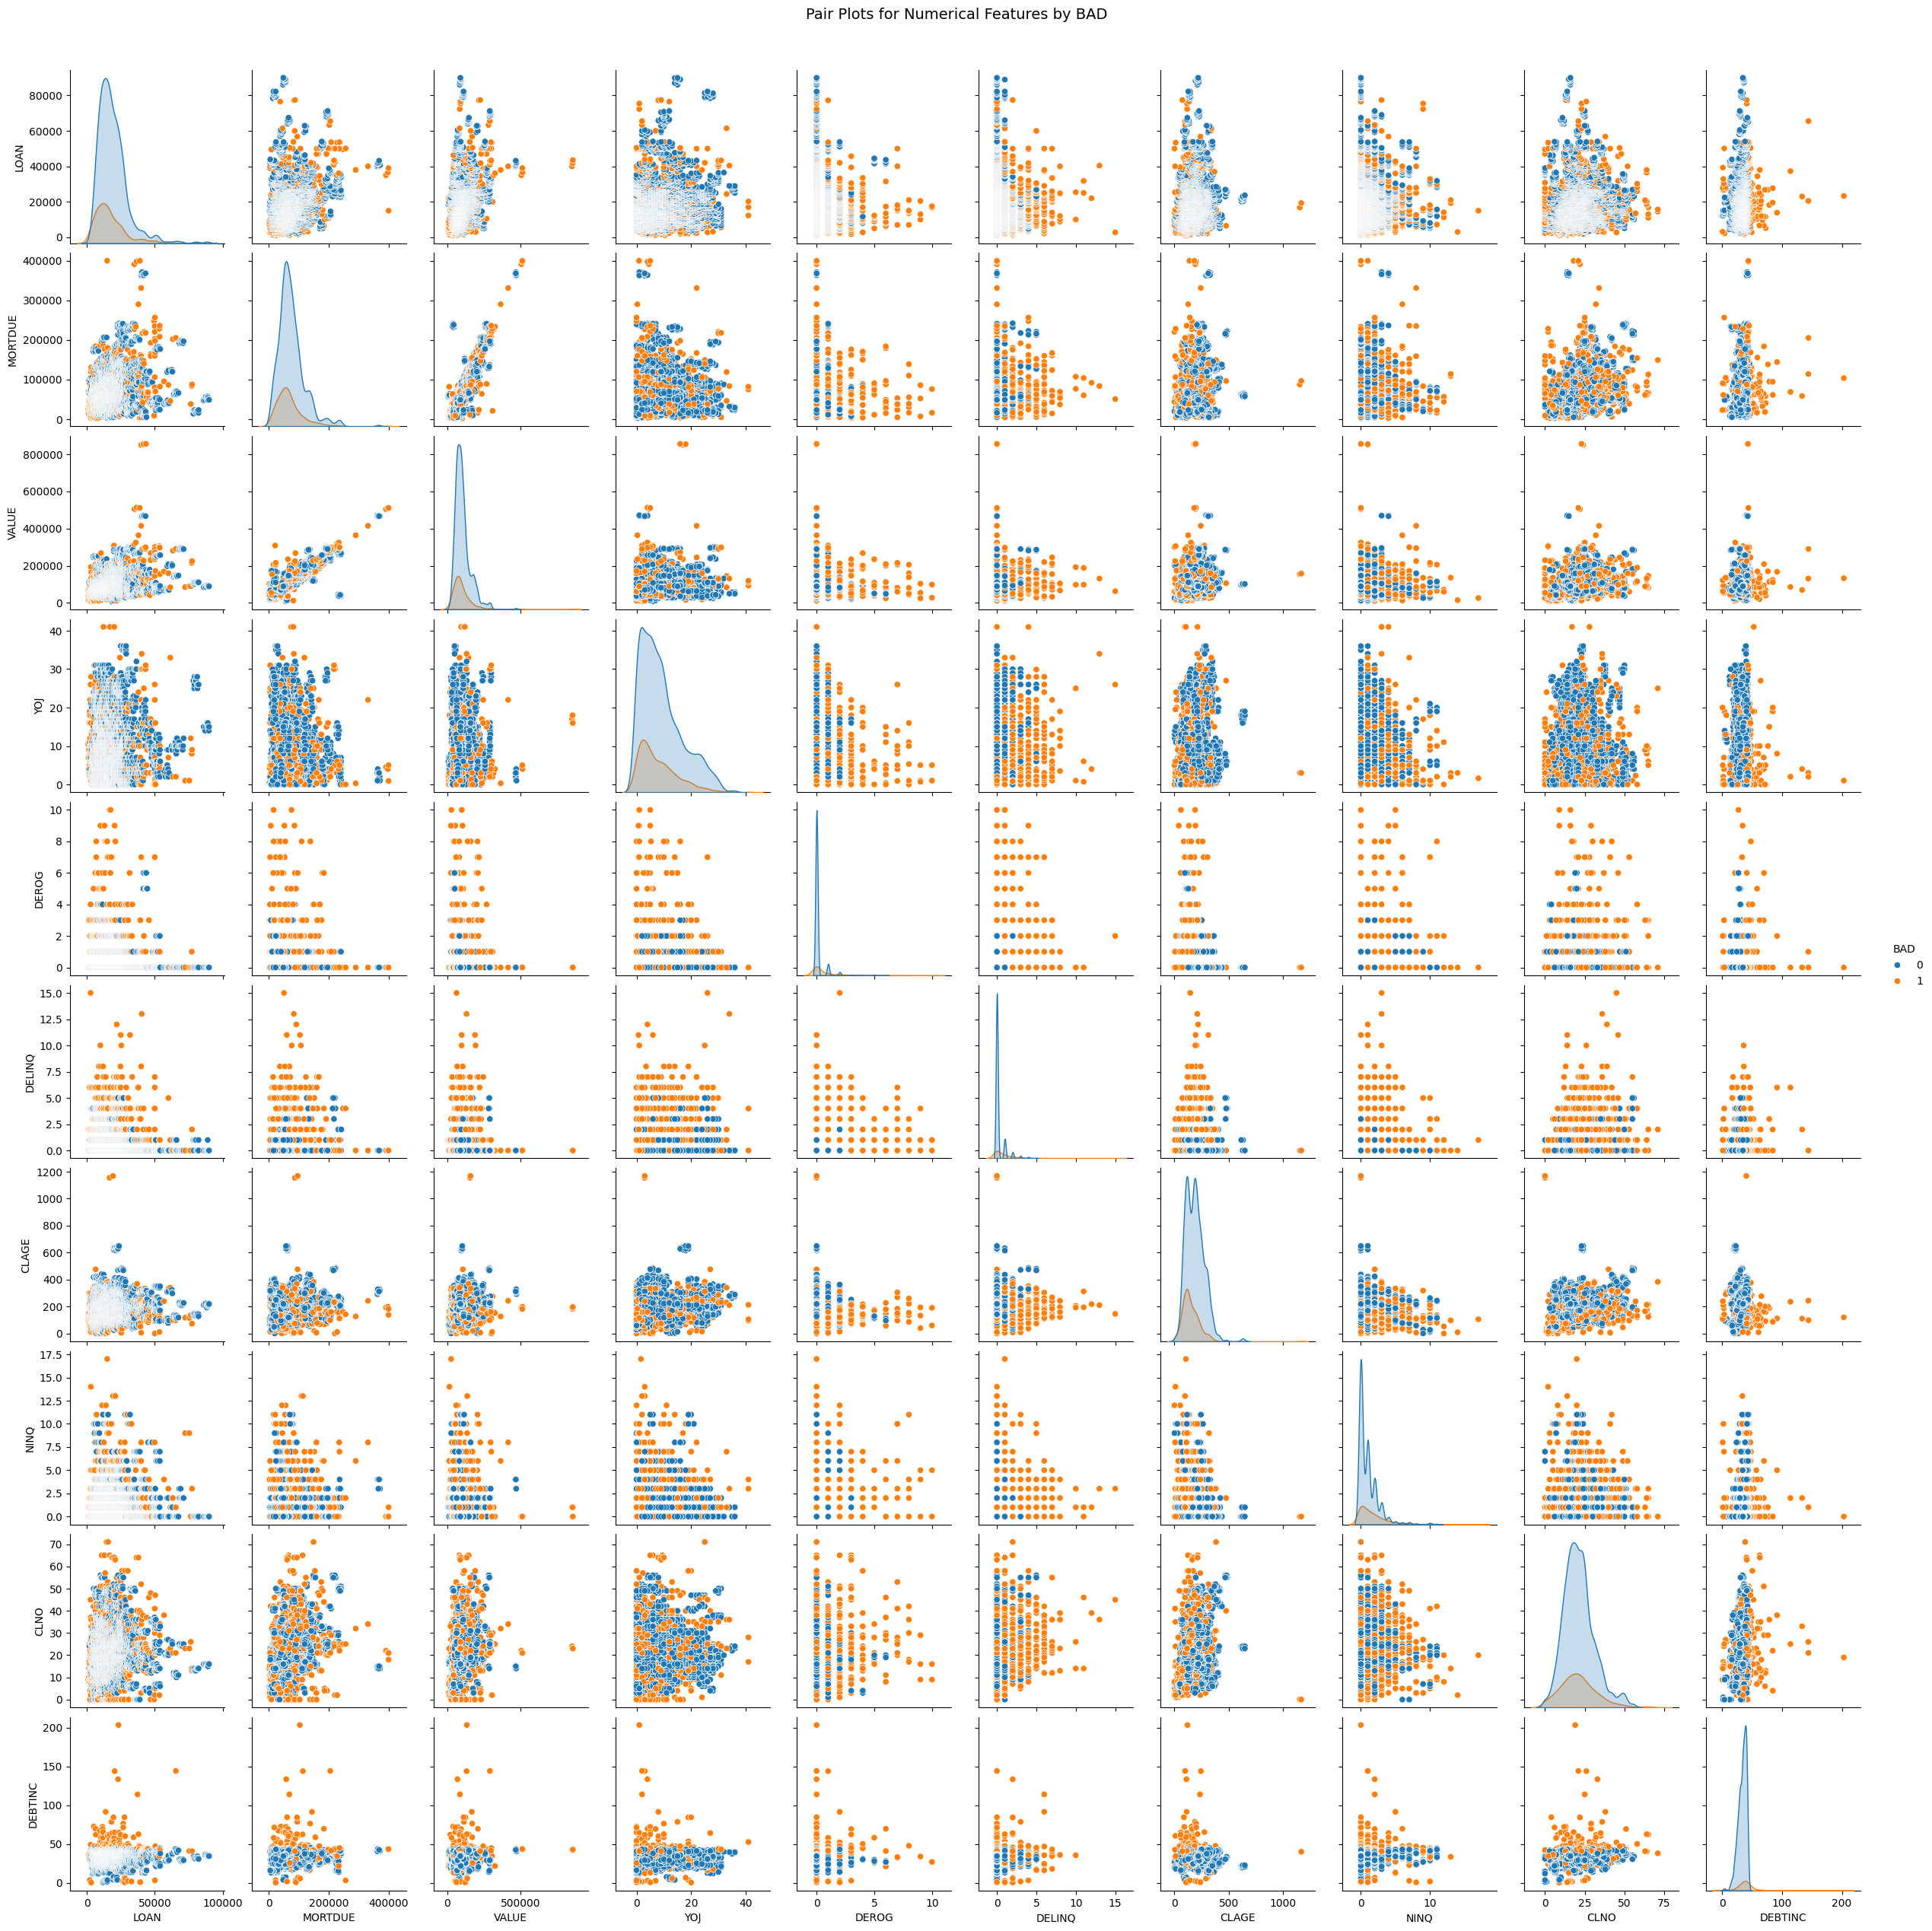

In [9]:
# Identify categorical columns in the dataset dynamically
categorical_cols = [col for col in data.select_dtypes(include=['object']).columns if col != 'BAD']

# Add any custom categorical columns, if they exist in the dataset
categorical_cols += [col for col in categorical_cols if col in data.columns]

# Remove duplicates from the categorical columns list
categorical_cols = list(set(categorical_cols))

# Function to create both boxplots and a pair plot
def create_visualizations(data, columns, x_col):
    # Loop to create boxplots for each numerical column
    for col in columns:
        plt.figure(figsize=(10, 6))

        # Create the boxplot
        sns.boxplot(data=data, x=x_col, y=col)

        # Add labels and title
        plt.title(f'Boxplot of {col} by {x_col}')
        plt.xlabel(x_col.capitalize())
        plt.ylabel(col.capitalize())

        # Show plot
        plt.show()

    # Create a pair plot for all numerical columns with the target variable as hue
    sns.pairplot(data, hue=x_col, vars=columns, height=2.5)
    plt.suptitle("Pair Plots for Numerical Features by BAD", y=1.02, fontsize=14)  # Adding a title
    plt.show()

# Define columns_to_plot with the desired numerical columns
columns_to_plot = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']  # Example columns

# Call the function with the defined columns_to_plot
create_visualizations(data, columns_to_plot, x_col="BAD")

# **Feature Distributions:**
- Differ noticeably by "BAD" category.
- Some variables show distinct spread and skewness.

**Scatter Plots:**
- Highlight potential correlations, such as between LOAN and VALUE.
- CLAGE exhibits clustering tied to the "BAD" category.

**Overlapping Areas:**
- Suggest weaker discriminative power in certain plots.

**Outliers:**
- Features like NINQ and DELINQ may strongly influence predictions.


## Treating Outliers

In [31]:
# Identify numerical columns to check for skewness
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Log transform columns with high skewness
for col in numerical_cols:
    if col != 'BAD':  # Skip the target variable
        # Add a small constant (e.g., 1) to avoid log(0)
        data[col] = np.log1p(data[col])  # log1p handles log(1 + x)

# Select only the numerical columns for scaling
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Exclude the target variable 'BAD' from scaling
numerical_cols = [col for col in numerical_cols if col != 'BAD']

#  Create scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler
data_standardized = data.copy()
data_standardized[numerical_cols] = standard_scaler.fit_transform(data[numerical_cols])

# Apply MinMaxScaler
data_scaled = data.copy()
data_scaled[numerical_cols] = minmax_scaler.fit_transform(data[numerical_cols])

#  View summary of scaled data
print("Standardized Data Summary:")
print(data_standardized.describe())

print("\nMin-Max Scaled Data Summary:")
print(data_scaled.describe())

# Verify the transformation
print("Log-Transformed Data Summary:")
print(data.describe())

Standardized Data Summary:
               BAD          LOAN       MORTDUE         VALUE           YOJ  \
count  5960.000000  5.960000e+03  5.442000e+03  5.848000e+03  5.445000e+03   
mean      0.199497  7.629989e-17 -1.368337e-15  1.632985e-15 -9.395606e-17   
std       0.399656  1.000084e+00  1.000092e+00  1.000086e+00  1.000092e+00   
min       0.000000 -4.626473e+00 -5.270559e+00 -4.807228e+00 -2.102185e+00   
25%       0.000000 -6.191517e-01 -4.432267e-01 -6.066988e-01 -6.019165e-01   
50%       0.000000  4.709674e-02  8.459782e-02 -8.870776e-03  1.482178e-01   
75%       0.000000  6.666591e-01  6.147102e-01  5.775514e-01  7.538425e-01   
max       1.000000  3.008142e+00  2.902840e+00  4.489359e+00  1.942777e+00   

              DEROG        DELINQ         CLAGE          NINQ          CLNO  \
count  5.252000e+03  5.380000e+03  5.652000e+03  5.450000e+03  5.738000e+03   
mean  -8.793846e-18  1.584854e-17  5.028611e-17  7.822489e-18  7.826124e-16   
std    1.000095e+00  1.000093e+00

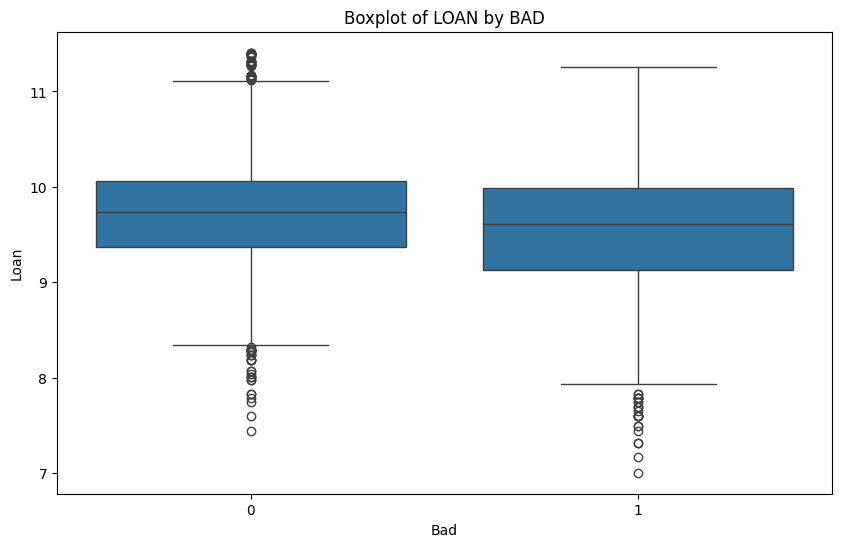

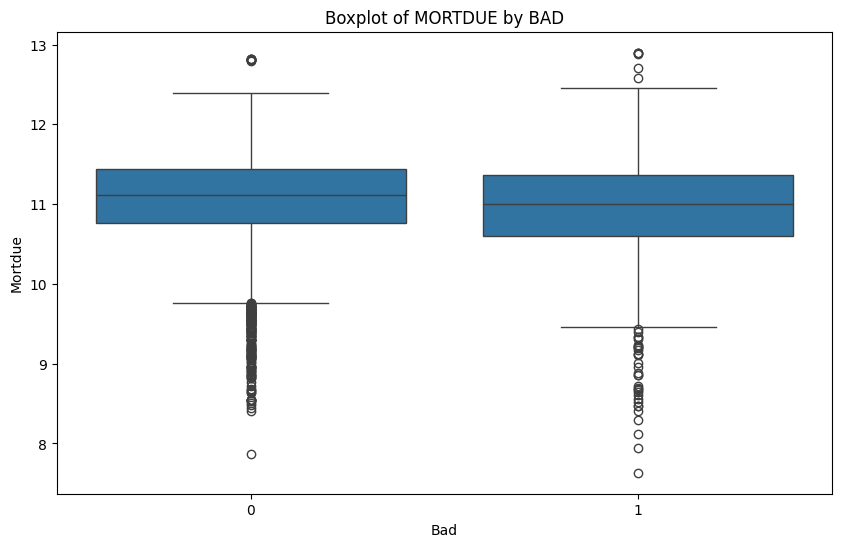

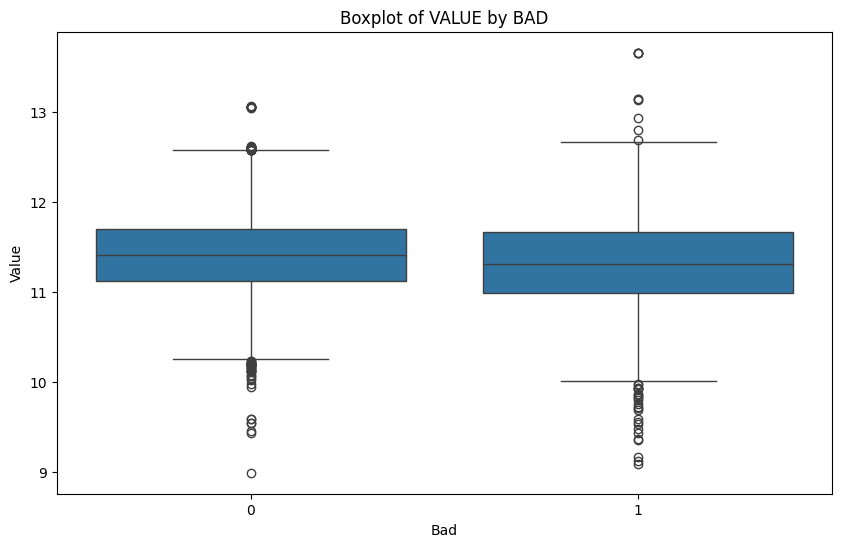

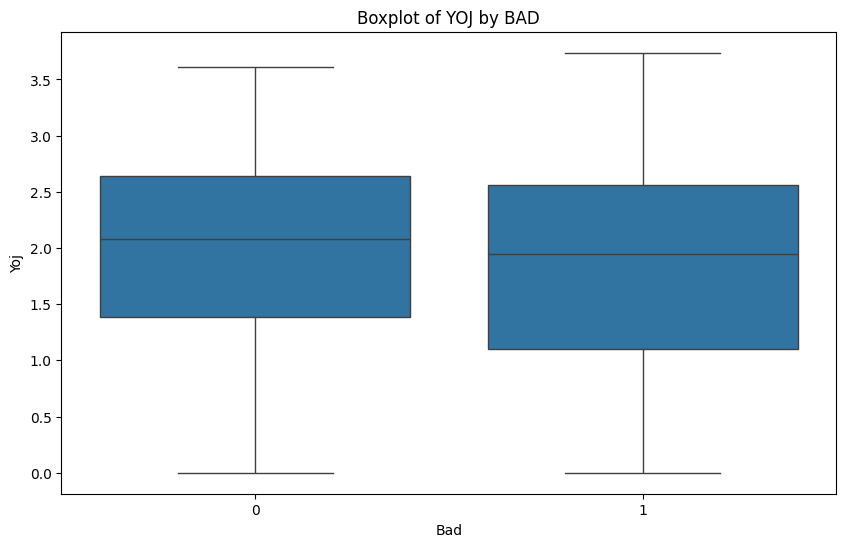

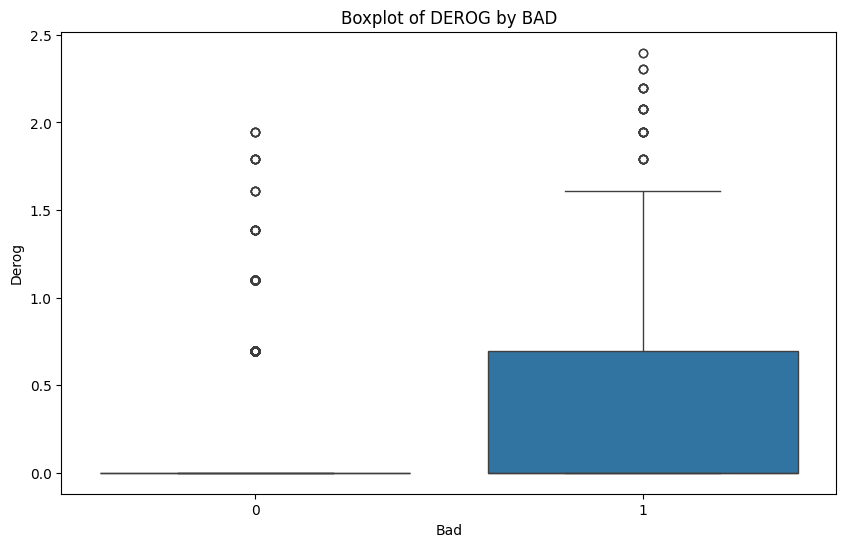

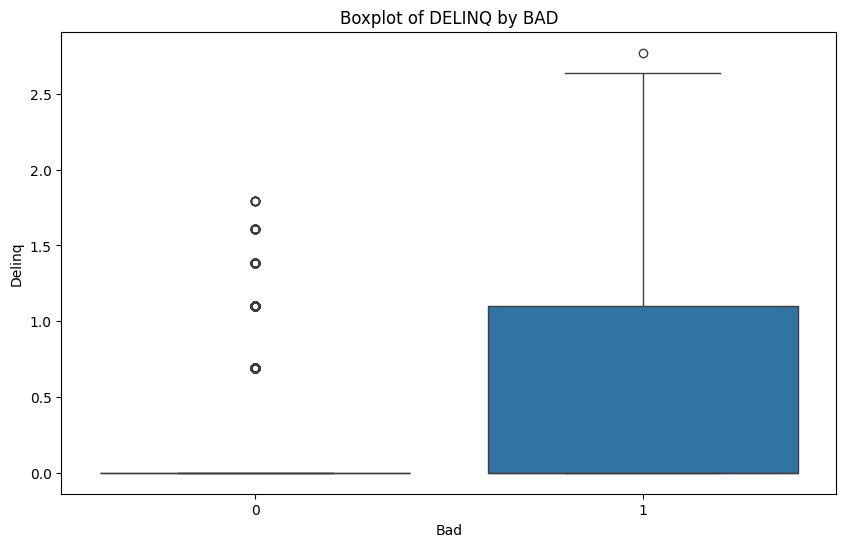

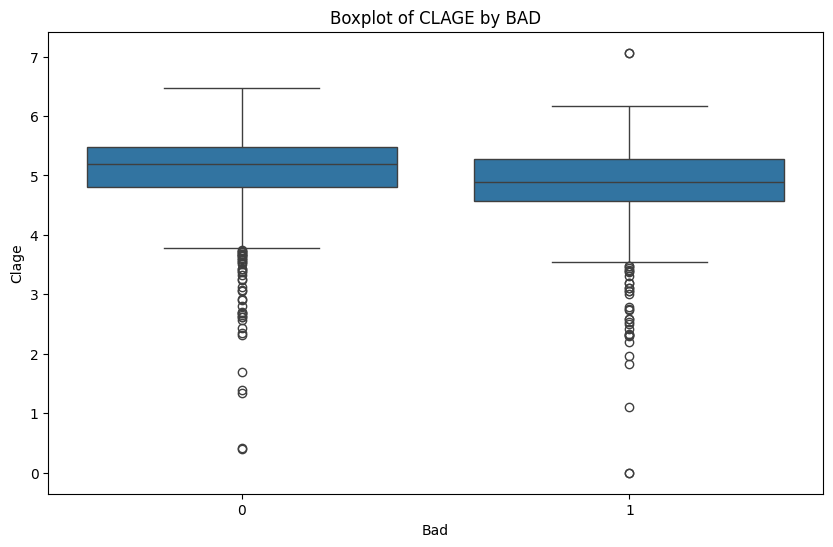

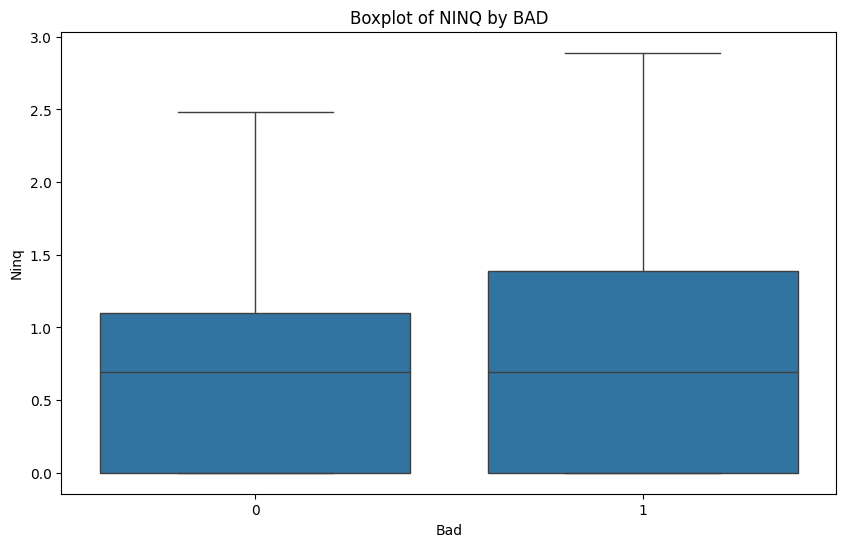

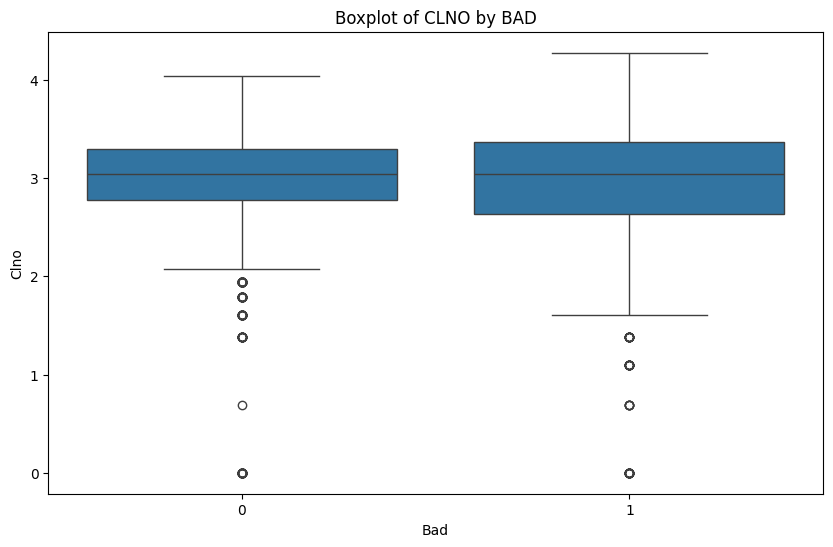

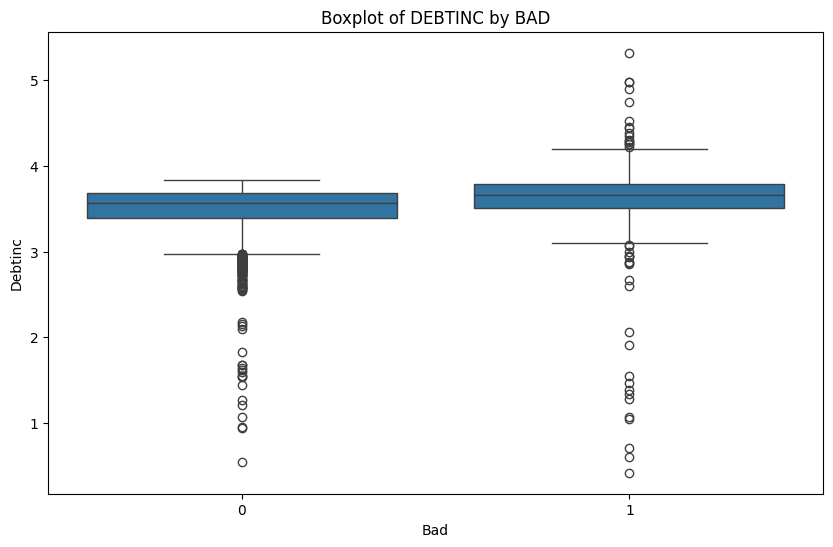

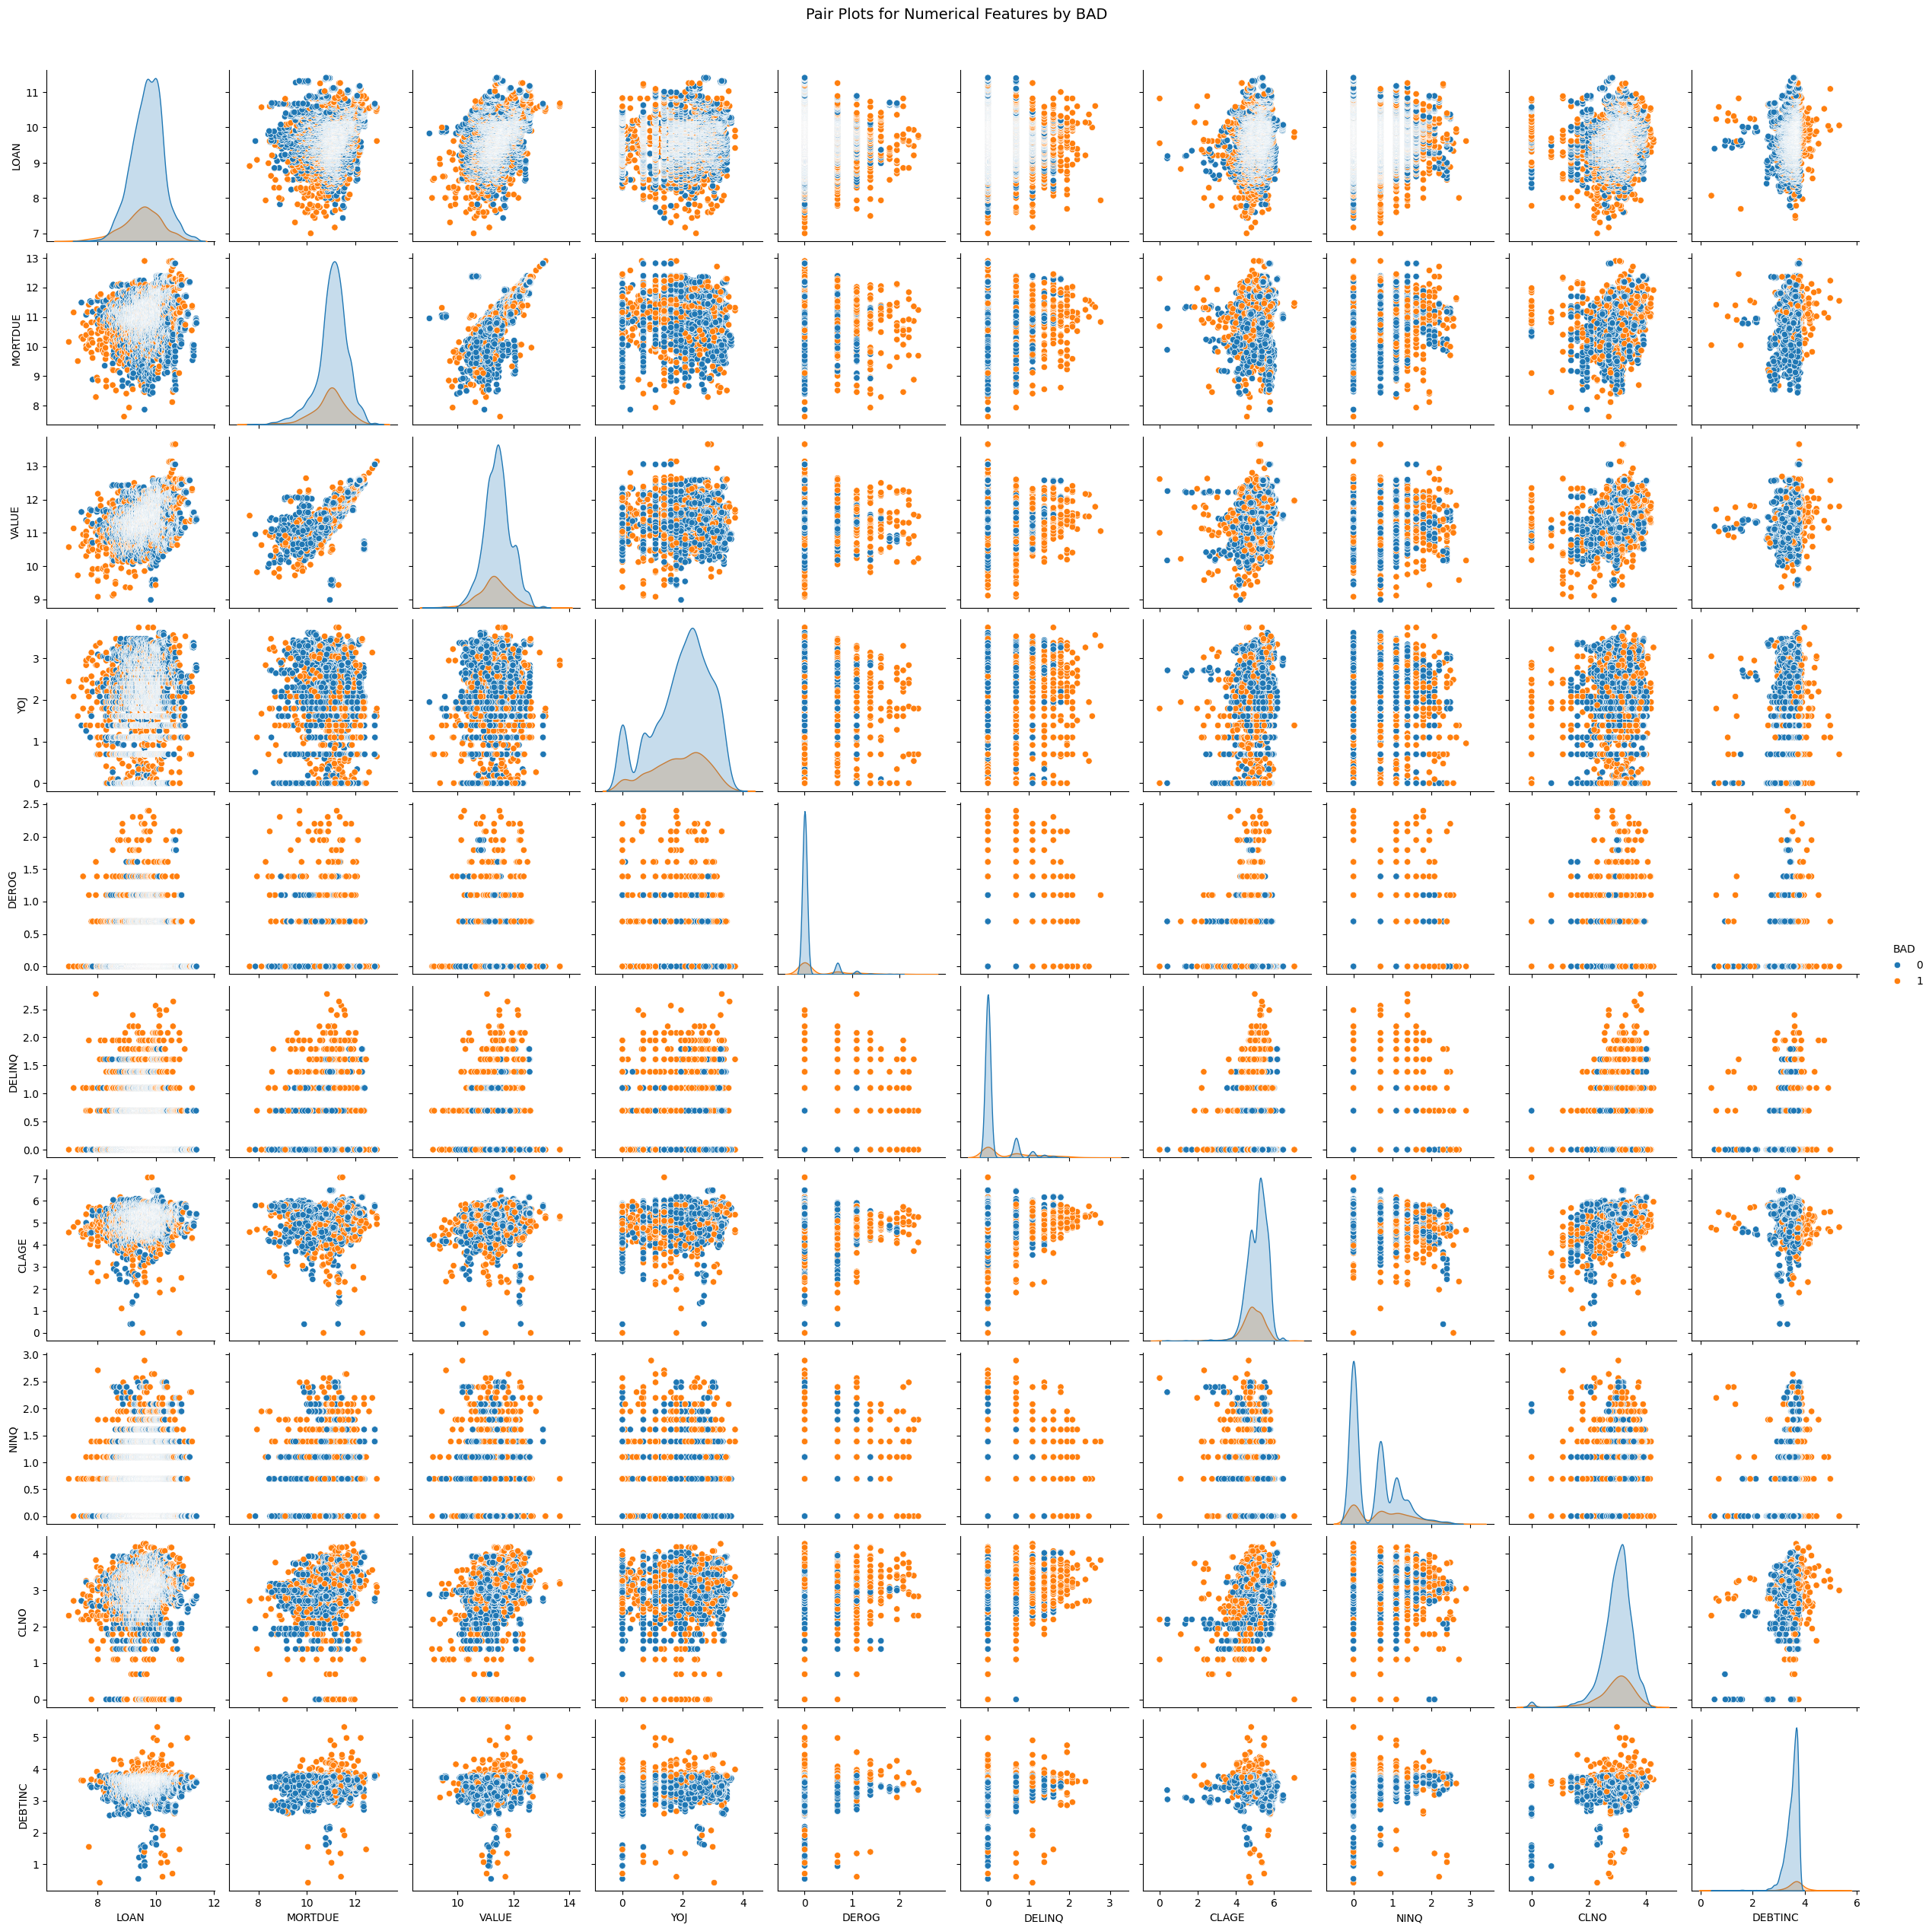

In [11]:
# Function to create both boxplots and a pair plot to see if skewness is reduced
def create_visualizations(data, columns, x_col):
    # Loop to create boxplots for each numerical column
    for col in columns:
        plt.figure(figsize=(10, 6))

        # Create the boxplot
        sns.boxplot(data=data, x=x_col, y=col)

        # Add labels and title
        plt.title(f'Boxplot of {col} by {x_col}')
        plt.xlabel(x_col.capitalize())
        plt.ylabel(col.capitalize())

        # Show plot
        plt.show()

    # Create a pair plot for all numerical columns with the target variable as hue
    sns.pairplot(data, hue=x_col, vars=columns, height=2.5)
    plt.suptitle("Pair Plots for Numerical Features by BAD", y=1.02, fontsize=14)  # Adding a title
    plt.show()

# Call the function
create_visualizations(data, columns_to_plot, x_col="BAD")

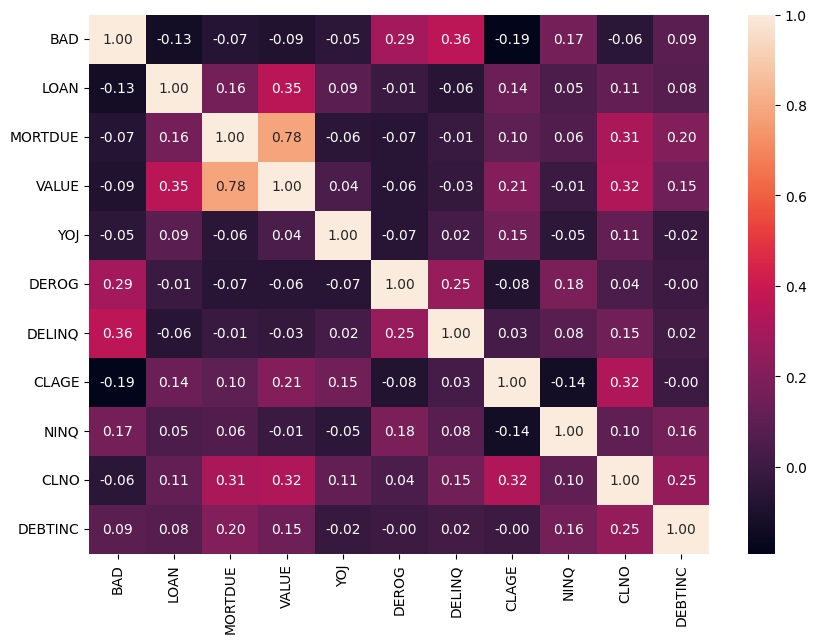

In [12]:
#Pairwise correlations between all the variables.
plt.figure(figsize=(10, 7))

# Select only the numeric columns
datanumbers = data.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(datanumbers.corr(), annot=True, fmt=".2f")

plt.show()

**HIGH PREDICTIVE VALUE:**

* Positive correlations with BAD: DEROG (0.29) and DELINQ (0.36).
Higher derogatory marks or delinquencies align with negative outcomes.  NINQ (0.17) has some correlation wit BAD.  Number of inquiries might contribute to negative outcomes.

* CLAGE has negative correlation with BAD.  People with older accounts seem be less likely to default.

**CORRELATED VALUES:**

* MORTDUE and VALUE (0.78): Proportional relationship between mortgage dues and property values as expected.

* LOAN and VALUE (0.35): Moderate link.

* CLAGE and CLNO: Older credit histories associated with more accounts.

* Perhaps combine these using feature engineering or use PCA to reduce multicollinearity.




## Treating Missing Values

In [32]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Fill missing values in numerical columns with the median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

# Fill missing values in categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify if there are any remaining missing values
print(data.isnull().sum())


BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

* The strong relationship between MORTDUE, VALUE, and LOAN suggests that higher property values drive higher mortgage dues and loan amounts. This indicates that MORTDUE and VALUE may capture similar information, potentially leading to multicollinearity in models, which can be addressed through feature selection or dimensionality reduction techniques such as PCA.
* CLAGE and CLNO (age and number of credit lines) demonstrate moderate connections with other credit-related features, reflecting financial stability. Although their direct correlation with BAD is weak, they may provide indirect predictive value when combined with other features in complex models.
* The relatively weak correlation between BAD and variables like YOJ or NINQ suggests limited individual predictive power for these features. Their overall contribution can be evaluated, and consideration can be given to excluding them if their importance remains low.

In [33]:
# Combine MORTDUE, VALUE, and LOAN into a single feature representing property-related variables.
# Might have low impact each but the combined might be predictive.
data['property_feature'] = data['MORTDUE'] + data['VALUE'] + data['LOAN']

# Normalize the newly created feature for scaling
scaler = StandardScaler()
data['property_feature_scaled'] = scaler.fit_transform(data[['property_feature']])

# Combine CLAGE and CLNO into a single feature representing financial stability
data['financial_stability'] = data['CLAGE'] * data['CLNO']

# Normalize the financial stability feature
data['financial_stability_scaled'] = scaler.fit_transform(data[['financial_stability']])

# Evaluate features with limited predictive power.  Keepling CLAGE as might have independent predictive power.
low_impact_features = ['YOJ', 'MORTDUE','VALUE','CLNO']  # Define features with low predictive value
data = data.drop(columns=low_impact_features)  # Exclude low-impact features if necessary

# Display the final engineered dataset
print("Engineered features added and low-impact features removed:")
print(data.head())

Engineered features added and low-impact features removed:
   BAD      LOAN   REASON     JOB  DEROG    DELINQ     CLAGE      NINQ  \
0    1  7.003974  HomeImp   Other    0.0  0.000000  4.557729  0.693147   
1    1  7.170888  HomeImp   Other    0.0  1.098612  4.810828  0.000000   
2    1  7.313887  HomeImp   Other    0.0  0.000000  5.013742  0.693147   
3    1  7.313887  DebtCon   Other    0.0  0.000000  5.161734  0.693147   
4    0  7.438972  HomeImp  Office    0.0  0.000000  4.546835  0.000000   

    DEBTINC  property_feature  property_feature_scaled  financial_stability  \
0  3.578458         27.736449                -3.360838            10.494559   
1  3.578458         29.461053                -2.034945            13.027965   
2  3.578458         26.547630                -4.274815            12.022427   
3  3.578458         29.795382                -1.777909            15.715014   
4  3.578458         30.555925                -1.193197            12.313056   

   financial_stabilit

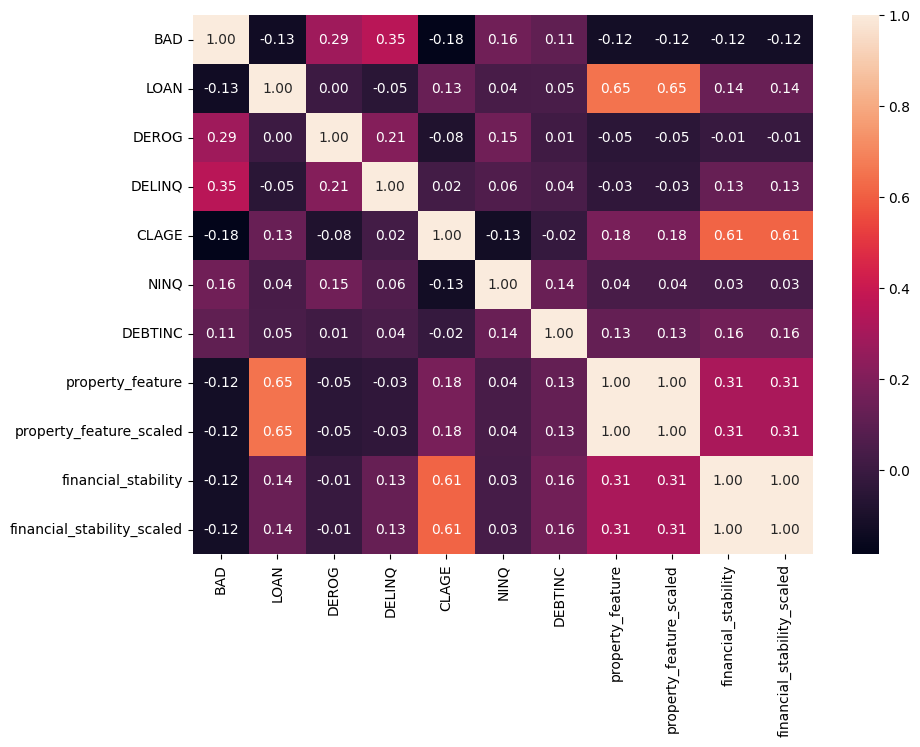

In [15]:
#Pairwise correlations between all the variables.
plt.figure(figsize=(10, 7))

# Select only the numeric columns
datanumbers = data.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(datanumbers.corr(), annot=True, fmt=".2f")

plt.show()

# Feature Engineering Process

- Created two new variables to enhance data representation (combine correlated and related features):
  - **Property-related financial aspects**: Combined multiple property-related financial variables into a single one.
  - **Financial stability**: Constructed by multiplying account age and number of credit lines to measure financial stability.

- Applied normalization using:
  - Scaled both variables to ensure uniformity across numerical variables.
  - Improved comparison and reduced biases in the dataset.

- Excluded features with limited predictive power:
  - Removed features like years on the job and features in the combined feature engineering.  Kept CLAGE as might be independently predictive.
  - Reduced noise and focused the model on high-value predictors.

- Enhanced the dataset for more accurate and efficient predictive modeling.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [34]:
# Separating the target variable and other variables
X = data.drop(columns = 'BAD')
Y = data['BAD']

# Creating dummy variables
X = pd.get_dummies(X, drop_first = True)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)


### Logistic Regression


--- Regression: Training Set Performance ---
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3382
           1       0.69      0.32      0.44       790

    accuracy                           0.84      4172
   macro avg       0.77      0.64      0.67      4172
weighted avg       0.83      0.84      0.82      4172



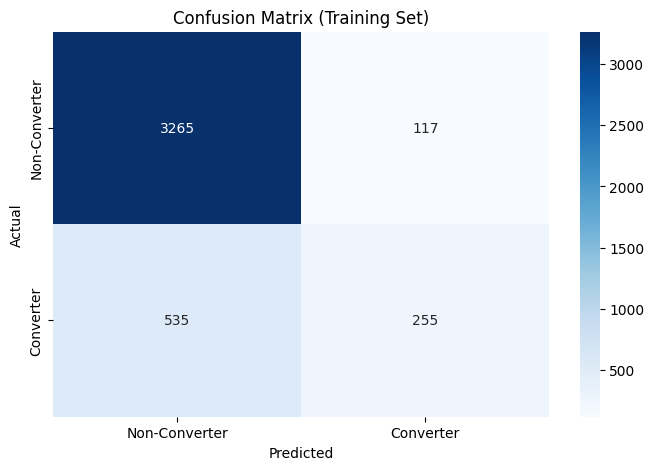


--- Regression: Test Set Performance ---
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1389
           1       0.69      0.33      0.44       399

    accuracy                           0.82      1788
   macro avg       0.76      0.64      0.67      1788
weighted avg       0.80      0.82      0.79      1788



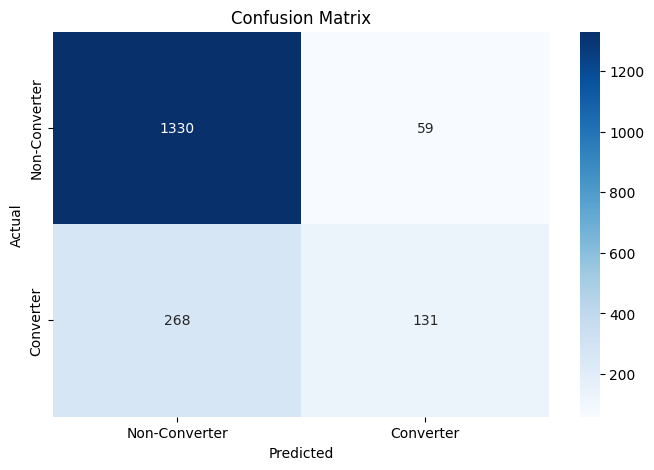


--- Variance Inflation Factor (VIF) ---
                       Feature       VIF
0                        DEROG  1.075006
1                       DELINQ  1.068016
2                      DEBTINC  1.056095
3                         NINQ  1.080378
4      property_feature_scaled  1.252043
5   financial_stability_scaled  1.180137
6               REASON_DebtCon       inf
7               REASON_HomeImp       inf
8                      JOB_Mgr       inf
9                   JOB_Office       inf
10                   JOB_Other       inf
11                 JOB_ProfExe       inf
12                   JOB_Sales       inf
13                    JOB_Self       inf

--- Feature Importance ---
                       Feature  Coefficient  Odds Ratio
12                   JOB_Sales     0.984918    2.677593
1                       DELINQ     0.729257    2.073540
0                        DEROG     0.476772    1.610866
2                      DEBTINC     0.359168    1.432137
3                         NINQ     0

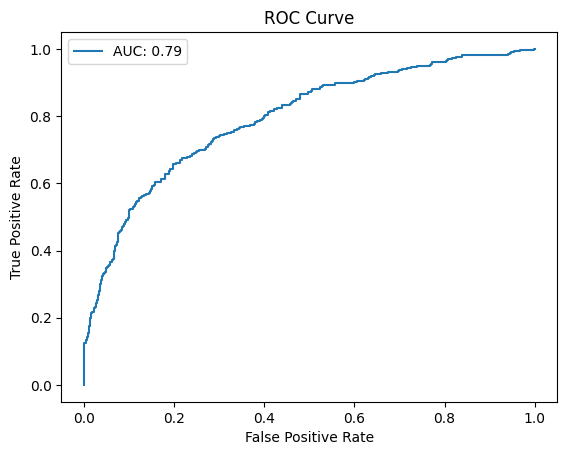

In [35]:
# Function to evaluate metrics and plot confusion matrix
def metrics_score(actual, predicted, title="Confusion Matrix"):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Converter', 'Converter'], yticklabels=['Non-Converter', 'Converter'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Define features and target
X = data[['REASON', 'JOB', 'DEROG', 'DELINQ', 'DEBTINC','NINQ',
          'property_feature_scaled', 'financial_stability_scaled']]

y = data['BAD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numerical and categorical columns
numerical_columns = ['DEROG', 'DELINQ', 'DEBTINC','NINQ',
                     'property_feature_scaled', 'financial_stability_scaled']
categorical_columns = ['REASON', 'JOB']


# Preprocessor: Scale numerical columns and encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Make predictions on the training set and evaluate
y_pred_train = pipeline.predict(X_train)
print("\n--- Regression: Training Set Performance ---")
metrics_score(y_train, y_pred_train, title="Confusion Matrix (Training Set)")

# Checking performance on the testing data
y_pred_test = pipeline.predict(X_test)
print("\n--- Regression: Test Set Performance ---")
metrics_score(y_test, y_pred_test)

# Extract Coefficients and Feature Importance
# Get feature names (numerical + one-hot encoded)
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = numerical_columns + list(feature_names)

# Check for Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Preprocessed data for VIF calculation
X_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = all_feature_names
vif_data["VIF"] = [variance_inflation_factor(X_preprocessed, i) for i in range(X_preprocessed.shape[1])]

print("\n--- Variance Inflation Factor (VIF) ---")
print(vif_data)

# Extract coefficients from the logistic regression model
coefficients = pipeline.named_steps['model'].coef_[0]

# Combine feature names, coefficients, and odds ratios
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Convert coefficients to odds ratios
}).sort_values(by='Coefficient', ascending=False)

print("\n--- Feature Importance ---")
print(feature_importance)

# Plot the ROC Curve and AUC
y_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(y_test, y_prob):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### **Add Ridge and Lasso**

## Use Ridge, Lasso and PCA


--- Logistic Regression: Training Set Performance ---
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3382
           1       0.69      0.32      0.44       790

    accuracy                           0.84      4172
   macro avg       0.77      0.64      0.67      4172
weighted avg       0.83      0.84      0.82      4172



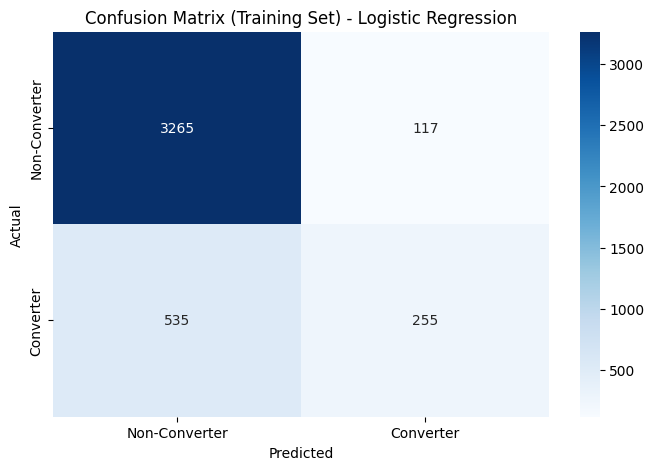


--- Logistic Regression: Test Set Performance ---
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1389
           1       0.69      0.33      0.44       399

    accuracy                           0.82      1788
   macro avg       0.76      0.64      0.67      1788
weighted avg       0.80      0.82      0.79      1788



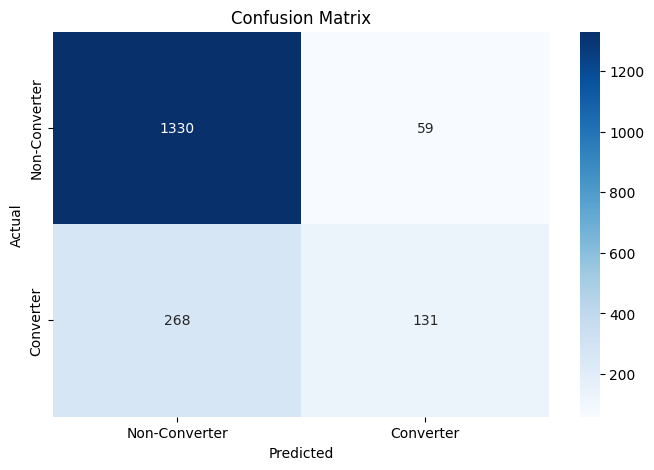

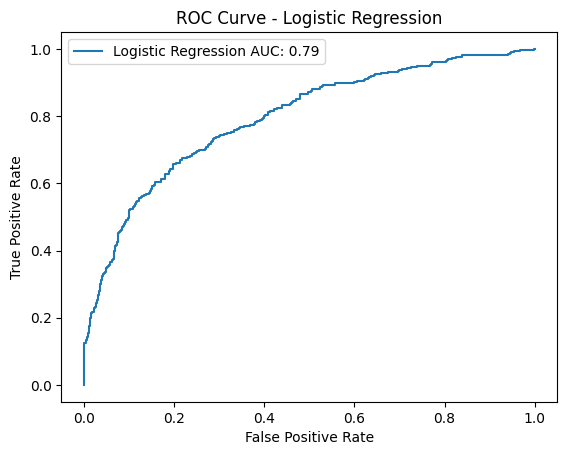


--- Ridge Regression: Training Set Performance ---
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3382
           1       0.70      0.29      0.41       790

    accuracy                           0.84      4172
   macro avg       0.77      0.63      0.66      4172
weighted avg       0.82      0.84      0.81      4172



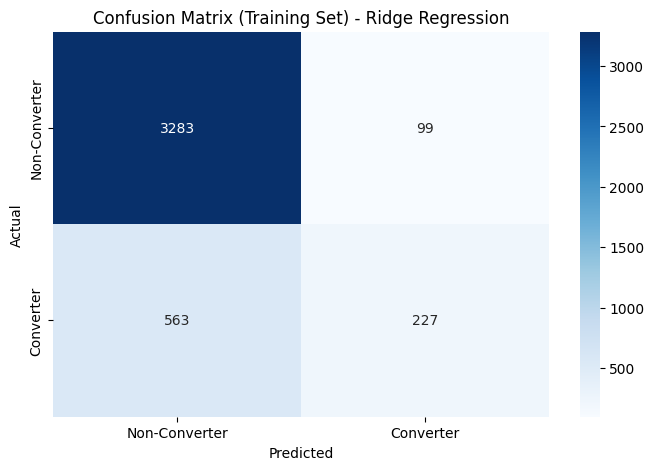


--- Ridge Regression: Test Set Performance ---
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1389
           1       0.71      0.31      0.43       399

    accuracy                           0.82      1788
   macro avg       0.77      0.63      0.66      1788
weighted avg       0.80      0.82      0.79      1788



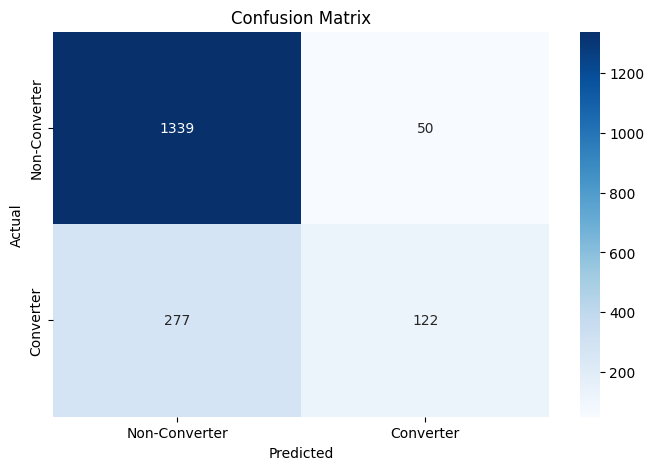

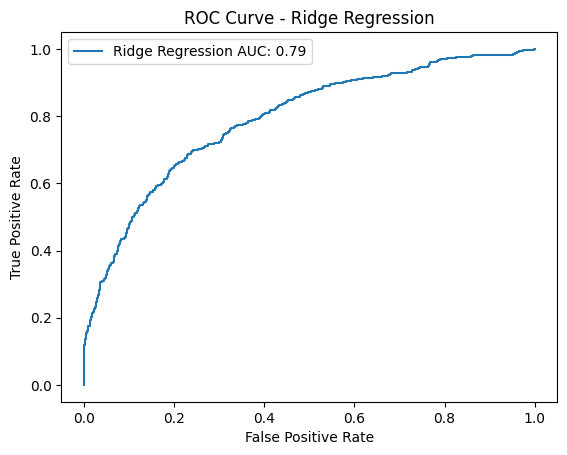


--- Lasso Regression: Training Set Performance ---
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      3382
           1       0.00      0.00      0.00       790

    accuracy                           0.81      4172
   macro avg       0.41      0.50      0.45      4172
weighted avg       0.66      0.81      0.73      4172



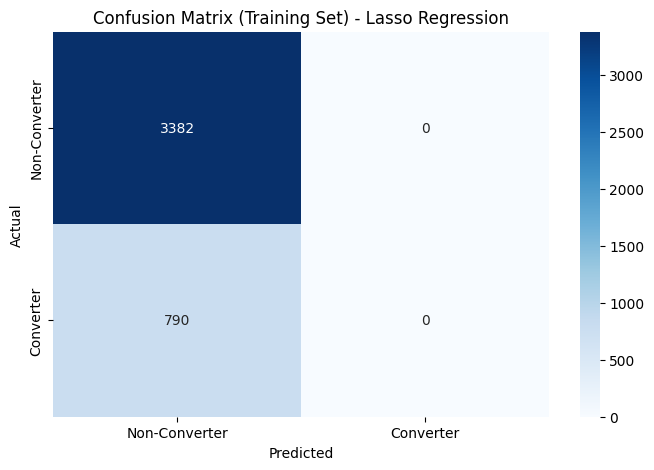


--- Lasso Regression: Test Set Performance ---
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1389
           1       0.00      0.00      0.00       399

    accuracy                           0.78      1788
   macro avg       0.39      0.50      0.44      1788
weighted avg       0.60      0.78      0.68      1788



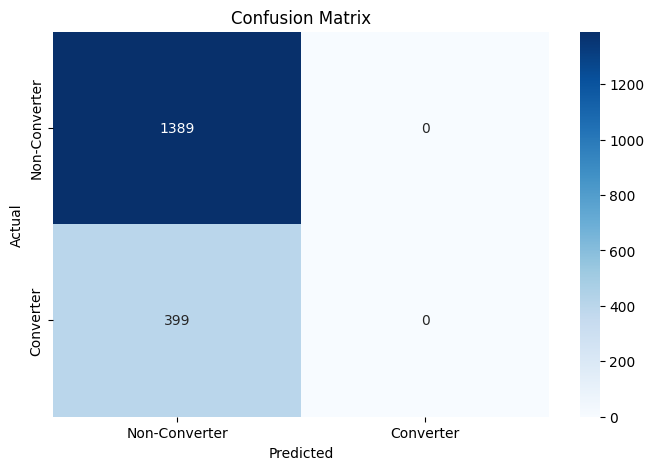

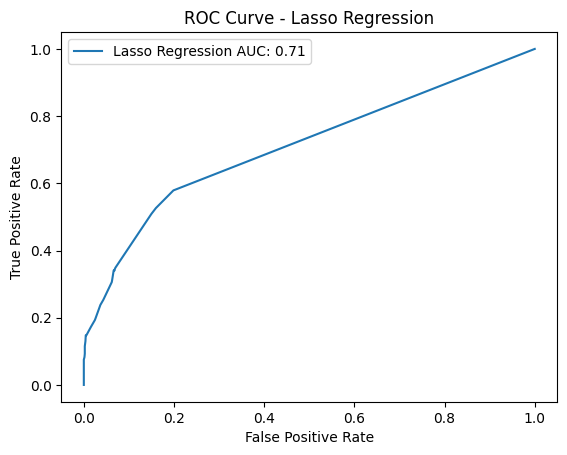


--- Variance Inflation Factor (VIF) ---
                       Feature       VIF
0                        DEROG  1.075006
1                       DELINQ  1.068016
2                      DEBTINC  1.056095
3                         NINQ  1.080378
4      property_feature_scaled  1.252043
5   financial_stability_scaled  1.180137
6               REASON_DebtCon       inf
7               REASON_HomeImp       inf
8                      JOB_Mgr       inf
9                   JOB_Office       inf
10                   JOB_Other       inf
11                 JOB_ProfExe       inf
12                   JOB_Sales       inf
13                    JOB_Self       inf

--- Feature Importance ---
                       Feature  Coefficient  Odds Ratio
12                   JOB_Sales     0.984918    2.677593
1                       DELINQ     0.729257    2.073540
0                        DEROG     0.476772    1.610866
2                      DEBTINC     0.359168    1.432137
3                         NINQ     0

In [36]:
# Function to evaluate metrics and plot confusion matrix
def metrics_score(actual, predicted, title="Confusion Matrix"):
    # Convert predictions to binary classes for classification metrics
    predicted_classes = (predicted > 0.5).astype(int)  # Assuming 0.5 threshold

    print(classification_report(actual, predicted_classes))
    cm = confusion_matrix(actual, predicted_classes)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Converter', 'Converter'], yticklabels=['Non-Converter', 'Converter'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Define features and target
X = data[['REASON', 'JOB', 'DEROG', 'DELINQ', 'DEBTINC', 'NINQ',
          'property_feature_scaled', 'financial_stability_scaled']]

y = data['BAD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numerical and categorical columns
numerical_columns = ['DEROG', 'DELINQ', 'DEBTINC','NINQ',
                     'property_feature_scaled', 'financial_stability_scaled']
categorical_columns = ['REASON', 'JOB']

# Preprocessor: Scale numerical columns and encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Create pipelines for Logistic Regression, Ridge, and Lasso
pipelines = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression())
    ]),
    'Ridge Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Ridge(alpha=1.0))
    ]),
    'Lasso Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Lasso(alpha=0.1))
    ])
}

# Train and evaluate each model
for name, pipeline in pipelines.items():
    print(f"\n--- {name}: Training Set Performance ---")
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    metrics_score(y_train, y_pred_train, title=f"Confusion Matrix (Training Set) - {name}")

    print(f"\n--- {name}: Test Set Performance ---")
    y_pred_test = pipeline.predict(X_test)
    metrics_score(y_test, y_pred_test)

    # Plot the ROC Curve and AUC for each model
    if name == 'Logistic Regression':
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = pipeline.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} AUC: {roc_auc_score(y_test, y_prob):.2f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

# Check for Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Preprocessed data for VIF calculation
X_preprocessed = pipelines['Logistic Regression'].named_steps['preprocessor'].transform(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
vif_data["VIF"] = [variance_inflation_factor(X_preprocessed, i) for i in range(X_preprocessed.shape[1])]

print("\n--- Variance Inflation Factor (VIF) ---")
print(vif_data)

# Extract coefficients from the logistic regression model
coefficients = pipelines['Logistic Regression'].named_steps['model'].coef_[0]

# Combine feature names, coefficients, and odds ratios
feature_importance = pd.DataFrame({
    'Feature': numerical_columns + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)),
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Convert coefficients to odds ratios
}).sort_values(by='Coefficient', ascending=False)

print("\n--- Feature Importance ---")
print(feature_importance)



--- Logistic Regression: Training Set Performance ---
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3382
           1       0.63      0.27      0.38       790

    accuracy                           0.83      4172
   macro avg       0.74      0.62      0.64      4172
weighted avg       0.81      0.83      0.80      4172



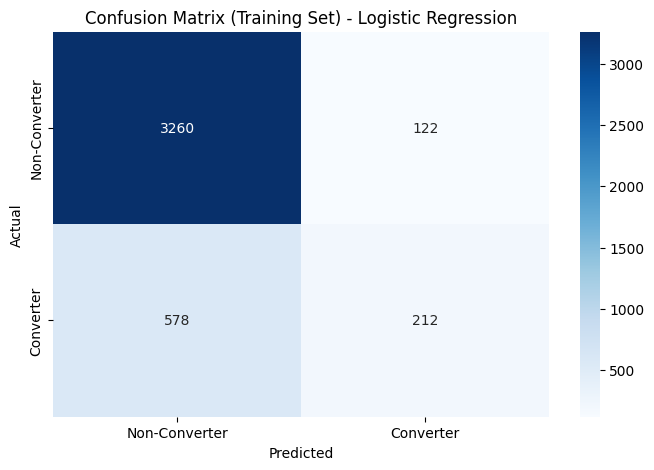


--- Logistic Regression: Test Set Performance ---
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1389
           1       0.65      0.26      0.37       399

    accuracy                           0.80      1788
   macro avg       0.73      0.61      0.63      1788
weighted avg       0.78      0.80      0.77      1788



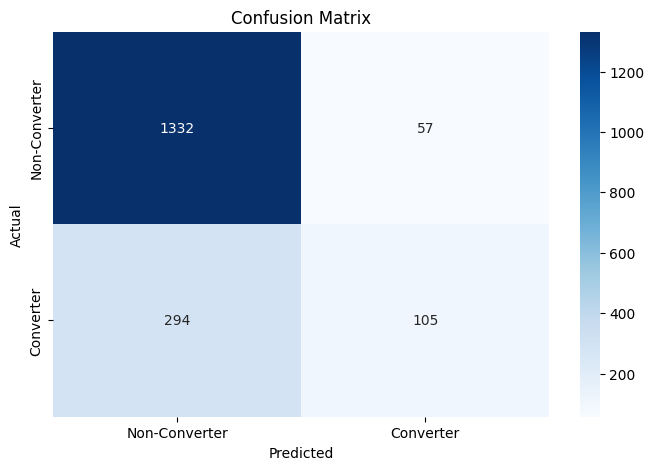

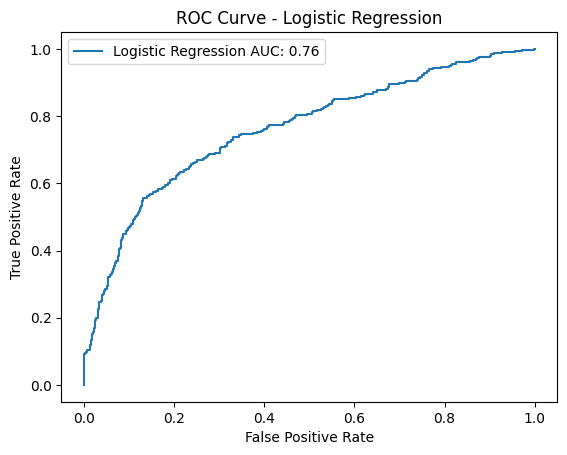


--- Ridge Regression: Training Set Performance ---
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3382
           1       0.66      0.23      0.35       790

    accuracy                           0.83      4172
   macro avg       0.75      0.60      0.63      4172
weighted avg       0.81      0.83      0.80      4172



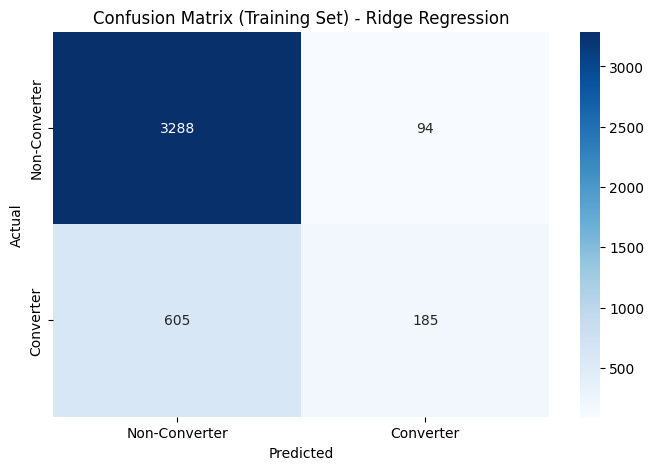


--- Ridge Regression: Test Set Performance ---
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1389
           1       0.68      0.23      0.35       399

    accuracy                           0.80      1788
   macro avg       0.75      0.60      0.62      1788
weighted avg       0.79      0.80      0.77      1788



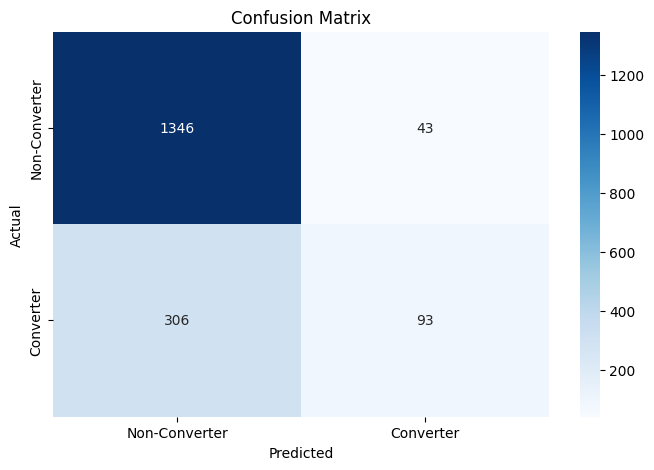

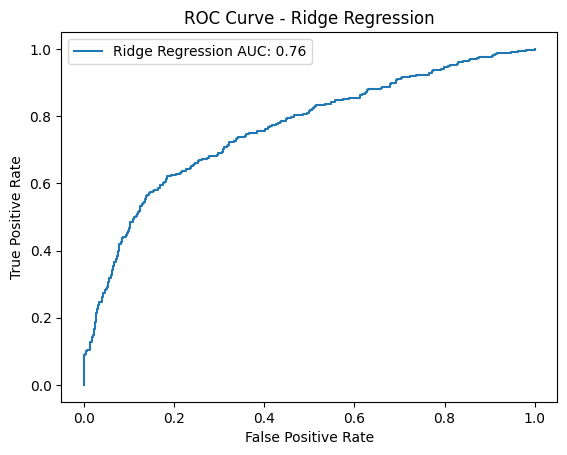


--- Lasso Regression: Training Set Performance ---
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3382
           1       1.00      0.03      0.06       790

    accuracy                           0.82      4172
   macro avg       0.91      0.52      0.48      4172
weighted avg       0.85      0.82      0.74      4172



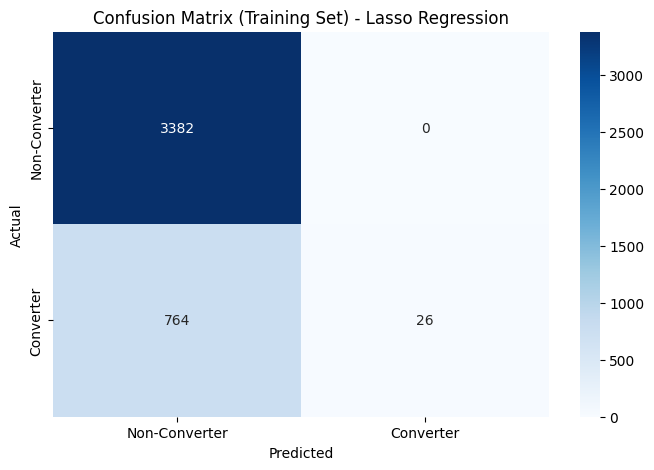


--- Lasso Regression: Test Set Performance ---
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1389
           1       1.00      0.02      0.04       399

    accuracy                           0.78      1788
   macro avg       0.89      0.51      0.46      1788
weighted avg       0.83      0.78      0.69      1788



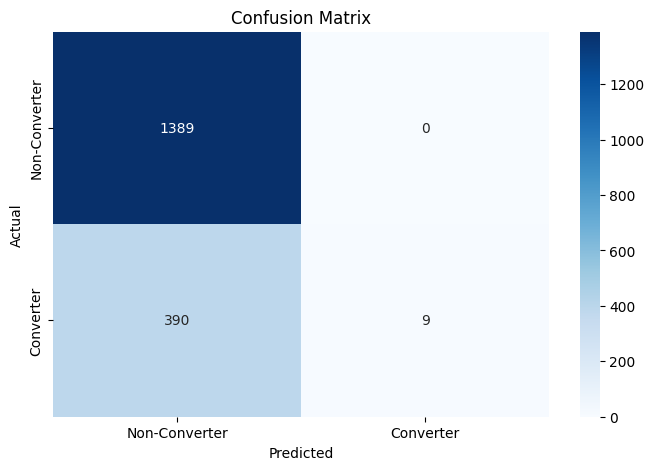

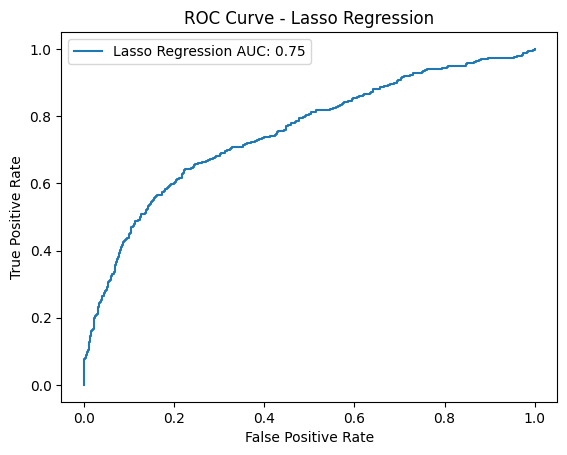


--- Updated Variance Inflation Factor (VIF) ---
           Feature      VIF
0  PCA_Component_1  1.07747
1  PCA_Component_2  1.04396
2   REASON_DebtCon      inf
3   REASON_HomeImp      inf
4          JOB_Mgr      inf
5       JOB_Office      inf
6        JOB_Other      inf
7      JOB_ProfExe      inf
8        JOB_Sales      inf
9         JOB_Self      inf

--- Feature Importance ---
           Feature  Coefficient  Odds Ratio
1  PCA_Component_2     0.912262    2.489949
8        JOB_Sales     0.902123    2.464830
9         JOB_Self     0.242520    1.274457
0  PCA_Component_1     0.155973    1.168794
3   REASON_HomeImp    -0.240099    0.786550
6        JOB_Other    -0.332978    0.716786
7      JOB_ProfExe    -0.360561    0.697285
4          JOB_Mgr    -0.381301    0.682972
2   REASON_DebtCon    -0.521248    0.593779
5       JOB_Office    -0.831148    0.435549


In [24]:
# Function to evaluate metrics and plot confusion matrix
def metrics_score(actual, predicted, title="Confusion Matrix"):
    # Convert predictions to binary classes for classification metrics
    predicted_classes = (predicted > 0.5).astype(int)  # Assuming 0.5 threshold

    print(classification_report(actual, predicted_classes))
    cm = confusion_matrix(actual, predicted_classes)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Converter', 'Converter'],
                yticklabels=['Non-Converter', 'Converter'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Define features and target
X = data[['REASON', 'JOB', 'DEROG', 'DELINQ', 'DEBTINC', 'NINQ',
          'property_feature_scaled', 'financial_stability_scaled']]
y = data['BAD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numerical and categorical columns
numerical_columns = ['DEROG', 'DELINQ', 'DEBTINC', 'NINQ',
                     'property_feature_scaled', 'financial_stability_scaled']
categorical_columns = ['REASON', 'JOB']

# Preprocessor: Scale numerical columns, apply PCA, and encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=2))  # Reduce numerical features to 2 components
        ]), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Create pipelines for Logistic Regression, Ridge, and Lasso
pipelines = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression())
    ]),
    'Ridge Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Ridge(alpha=1.0))
    ]),
    'Lasso Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', Lasso(alpha=0.1))
    ])
}

# Train and evaluate each model
for name, pipeline in pipelines.items():
    print(f"\n--- {name}: Training Set Performance ---")
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    metrics_score(y_train, y_pred_train, title=f"Confusion Matrix (Training Set) - {name}")

    print(f"\n--- {name}: Test Set Performance ---")
    y_pred_test = pipeline.predict(X_test)
    metrics_score(y_test, y_pred_test)

    # Plot the ROC Curve and AUC for each model
    if name == 'Logistic Regression':
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = pipeline.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} AUC: {roc_auc_score(y_test, y_prob):.2f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

# Check for Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Preprocessed data for VIF calculation (numerical + categorical)
X_preprocessed = pipelines['Logistic Regression'].named_steps['preprocessor'].transform(X_train)

# Extract numerical features post-PCA and original categorical features
numerical_pca_features = [f"PCA_Component_{i+1}" for i in range(2)]  # 2 components from PCA
categorical_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))

# Combine features for VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_pca_features + categorical_features
vif_data["VIF"] = [variance_inflation_factor(X_preprocessed, i) for i in range(X_preprocessed.shape[1])]

print("\n--- Updated Variance Inflation Factor (VIF) ---")
print(vif_data)

# Extract coefficients from the logistic regression model
coefficients = pipelines['Logistic Regression'].named_steps['model'].coef_[0]

# Combine feature names, coefficients, and odds ratios
feature_importance = pd.DataFrame({
    'Feature': numerical_pca_features + categorical_features,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Convert coefficients to odds ratios
}).sort_values(by='Coefficient', ascending=False)

print("\n--- Feature Importance ---")
print(feature_importance)

# **Analysis and Decision**
- PCA improved results slightly but interpretability is crucial for credit scoring.
- Ridge regression with dimension engineering is preferred for maintaining feature interpretability.

# **Detailed Results Analysis**
## **1. Model Performance**
- **Logistic Regression**: Slight improvement in minority recall with PCA.
- **Ridge Regression**: Stable performance, better balance of multicollinearity and predictive power.
- **Lasso Regression**: Struggled with class imbalance, no improvement with PCA.

## **2. Variance Inflation Factor (VIF)**
- **Before PCA**: Low VIF for numerical features, infinite for categorical.
- **After PCA**: Reduced VIF for numerical features, infinite for categorical persisted.

## **3. Feature Importance**
- **Before PCA**: Key numerical and categorical features were interpretable.
- **After PCA**: PCA components replaced numerical features, categorical remained influential.

# **Conclusion**
- Ridge regression is better for preserving interpretability and managing multicollinearity.
- PCA is less suitable due to reduced interpretability for numerical features.
-Even with accuracy of 80%, very low recall rate for minority class: not good at predicting defaulted loans.  I will move on to other models.


### Decision Tree

In [37]:
# Define a function to plot the confusion matrix and classification report
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=["Defaulted", "Did not Default"], yticklabels=["Defaulted", "Did not Default"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("Confusion Matrix")
    plt.show()

# Add the additional features
X = data[['REASON', 'JOB', 'DEROG', 'DELINQ', 'DEBTINC', 'NINQ',
          'property_feature_scaled', 'financial_stability_scaled']]

#  Convert categorical variables to dummy variables - was getting error so re-getting dummy variable
X = pd.get_dummies(X, drop_first=False)  # Apply one-hot encoding with drop_first=True to avoid multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

Decision Tree: Training Data Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



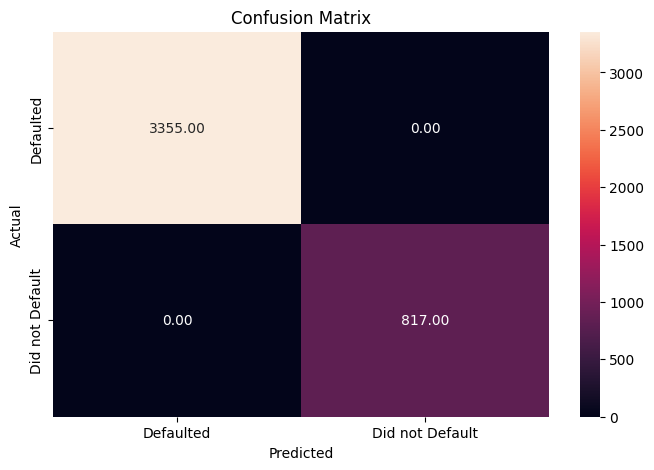

Decision Tree: Testing Data Performance:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1416
           1       0.64      0.60      0.62       372

    accuracy                           0.85      1788
   macro avg       0.77      0.76      0.76      1788
weighted avg       0.84      0.85      0.85      1788



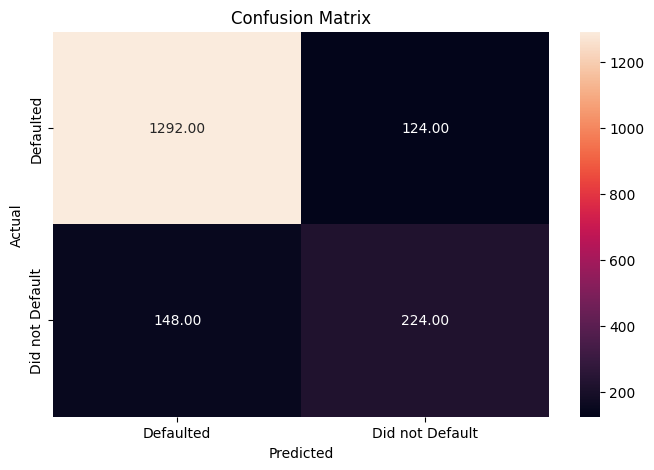

In [38]:
# Checking performance on the training data
y_pred_traind1 = d_tree.predict(X_train)
print("Decision Tree: Training Data Performance:")
metrics_score(y_train, y_pred_traind1)

# Checking performance on the testing data
y_pred_test1d1 = d_tree.predict(X_test)
print("Decision Tree: Testing Data Performance:")
metrics_score(y_test, y_pred_test1d1)

# **Observations**

- The Decision Tree model is **overfitting the training data**, as expected, which reduces its ability to generalize well on the test set.
- Overfitting explains the **perfect scores** (e.g., precision, recall, F1-score) on the training set and the performance drop on the test set.

## **Test Set Performance**
- Overall accuracy is **86%**, which is solid but leaves room for improvement.
- The **imbalance in the dataset** (majority vs. minority classes) affects the model’s ability to consistently predict the minority class.
- This imbalance is evident in the **lower performance metrics for the minority class** compared to the majority class in second classification report.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [39]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight='balanced')

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5, 10, 20, 25]
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(5),
                       min_samples_leaf=25, random_state=7)

Decision Tree Tuned: Training Data Performance:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3355
           1       0.55      0.86      0.67       817

    accuracy                           0.84      4172
   macro avg       0.76      0.84      0.78      4172
weighted avg       0.88      0.84      0.85      4172



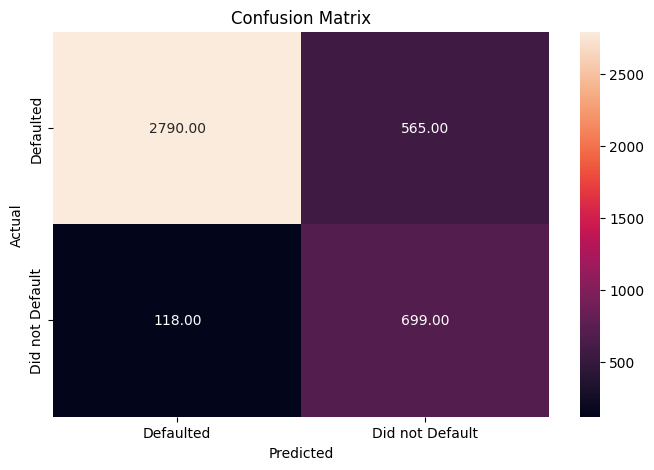

Decision Tree Tuned: Test Data Performance:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1416
           1       0.55      0.80      0.65       372

    accuracy                           0.82      1788
   macro avg       0.75      0.81      0.77      1788
weighted avg       0.86      0.82      0.83      1788



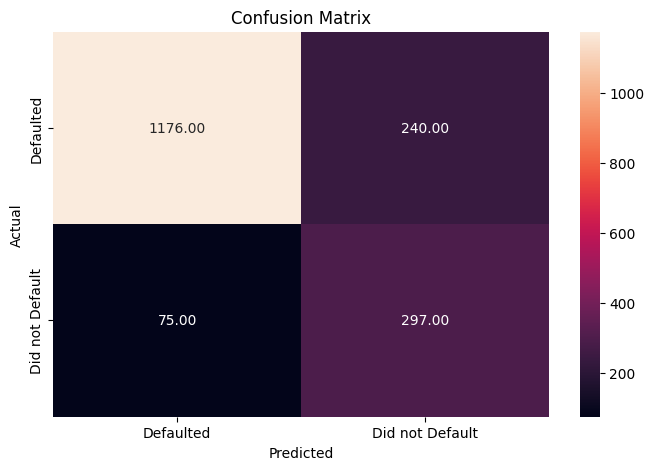

In [40]:
# Checking performance on the training data
y_pred_traind2 = d_tree_tuned.predict(X_train)
print("Decision Tree Tuned: Training Data Performance:")
metrics_score(y_train, y_pred_traind2)

# Checking performance on the testing data
y_pred_testd2 = d_tree_tuned.predict(X_test)
print("Decision Tree Tuned: Test Data Performance:")
metrics_score(y_test, y_pred_testd2)

### **Generalization**:
- The Decision Tree shows less overfitting than expected, maintaining strong minority class recall (80%) and overall accuracy (82%) on the test set compared to Logistic Regression.

### **Minority Class Performance:**
- The Decision Tree clearly outperforms Logistic Regression for minority class recall (80% vs. 23% on the test set) and F1-score (65% vs. 35%).

### **Trade-offs:**
- Logistic Regression prioritizes stability and interpretability but struggles with minority class prediction.
- The Decision Tree offers better performance for imbalanced datasets, though it may sacrifice some interpretability compared to Logistic Regression.
- Decision Tree clearly outperforms in the most important metric, the recall.


In [41]:
#Reduce depth to 3 for visualization
tree_model = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 3,
                       min_samples_leaf = 5, random_state = 7)

# Fit the best algorithm to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=7)

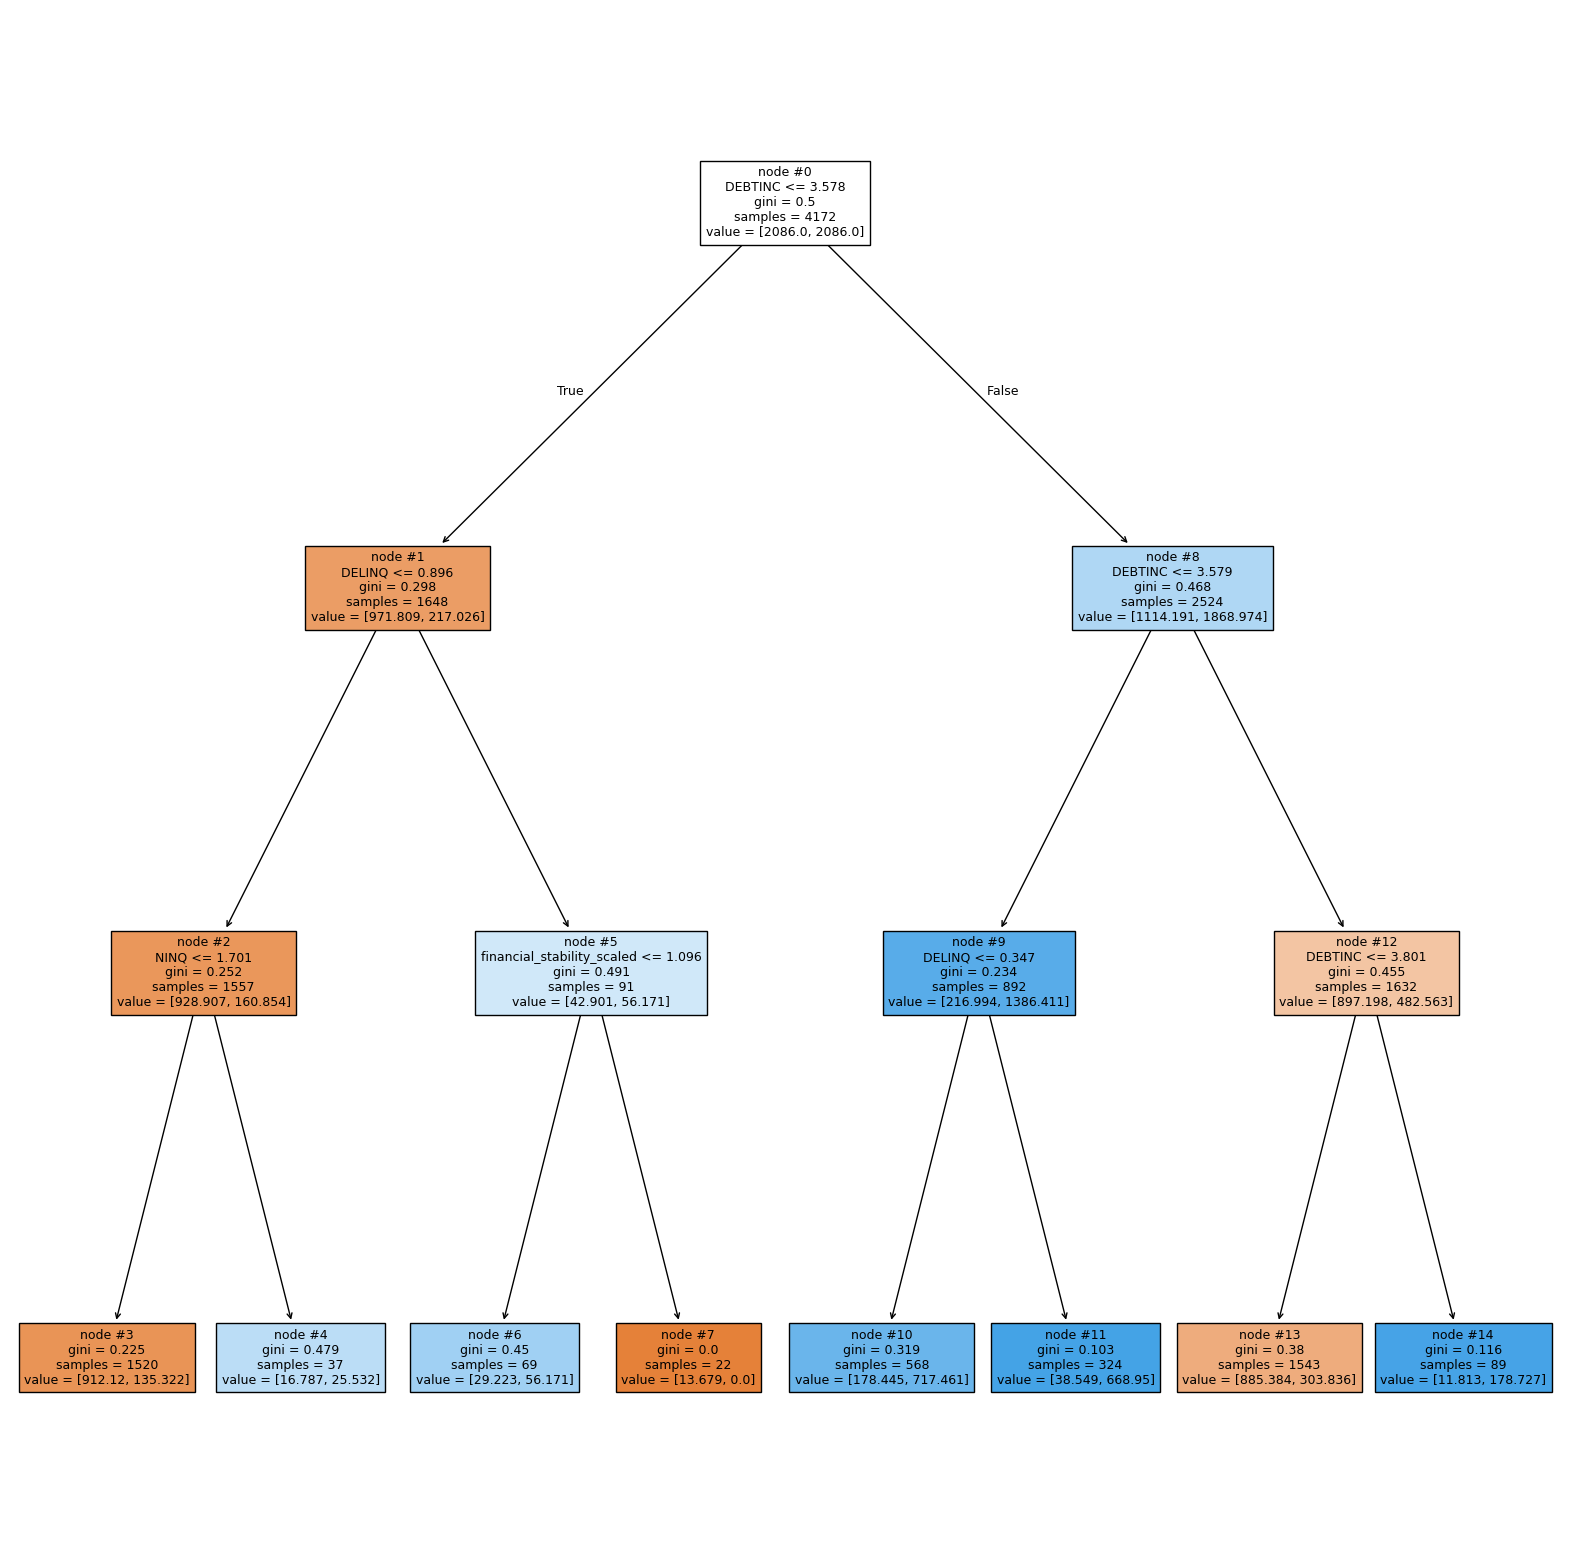

In [45]:
plt.figure(figsize=(20, 20))

plot_tree(tree_model, feature_names=features, filled=True, fontsize=9, node_ids=True, class_names=None)

plt.show()


                                 Imp
DEBTINC                     0.818155
DELINQ                      0.068805
financial_stability_scaled  0.062118
NINQ                        0.020469
property_feature_scaled     0.014642
DEROG                       0.007769
JOB_ProfExe                 0.005459
JOB_Office                  0.002583
REASON_HomeImp              0.000000
REASON_DebtCon              0.000000
JOB_Mgr                     0.000000
JOB_Other                   0.000000
JOB_Sales                   0.000000
JOB_Self                    0.000000


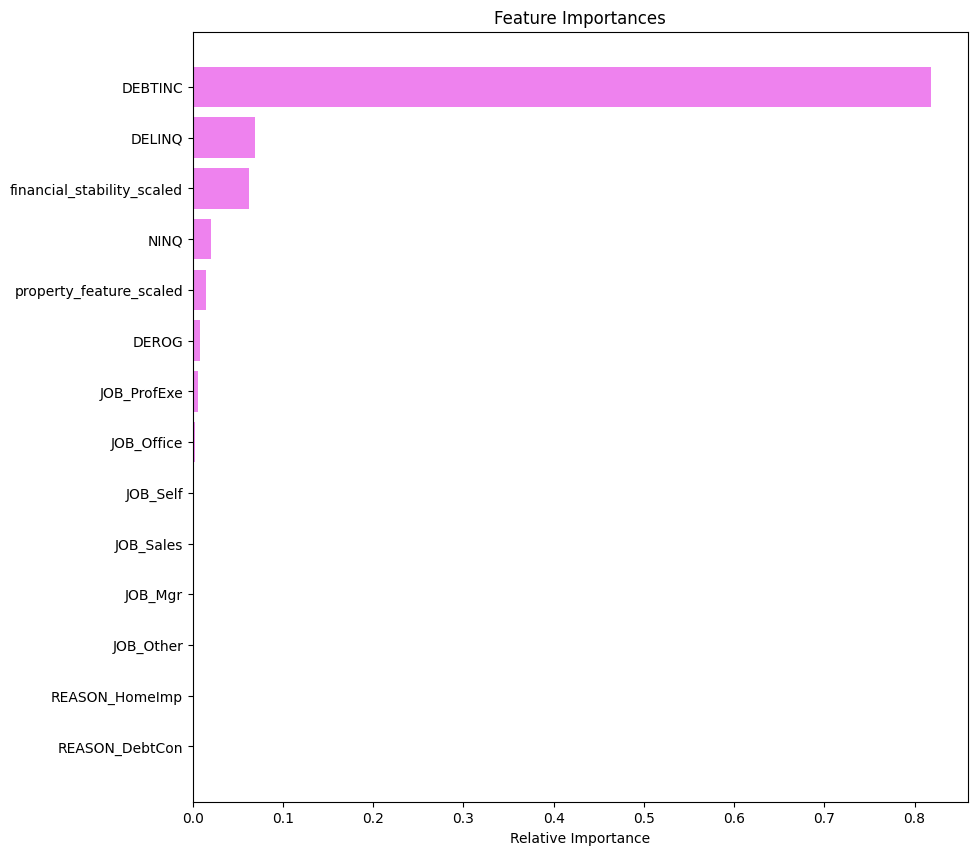

In [51]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

# **Decision Tree Interpretation**

## **Structure and Split Criteria**
- **Root Node**: Prioritizes debt-to-income ratio (**DEBTINC**), highlighting its significance.
- **Left Branch**: Focuses on delinquency (**DELINQ**), credit inquiries (**NINQ**), and financial stability.
- **Right Branch**: Continues to emphasize debt-to-income ratio and delinquency for refining predictions.

## **Feature Importance and Behavior**
- **Key Features**:
  - **DEBTINC** is the most influential feature.
  - **DELINQ** and financial stability metrics are also important.
  - Other features like property metrics and credit inquiries contribute in deeper splits.
- **Class Predictions**: Nodes with low gini impurity indicate confident predictions, with balanced sample distributions.

# **Model Insights**
- **Depth of Tree**: Balances interpretability and complexity, focusing on meaningful splits.
- **Balanced Class Handling**: Accommodates both majority and minority classes effectively.
- **Feature Priority**: High importance of **DEBTINC** and **DELINQ** in predicting credit risk, with opportunities to refine feature engineering for less impactful features.


### **Random Forest Classifier Hyperparameter Tuning**

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

In [52]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

Random Forest Untuned: Training Data Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



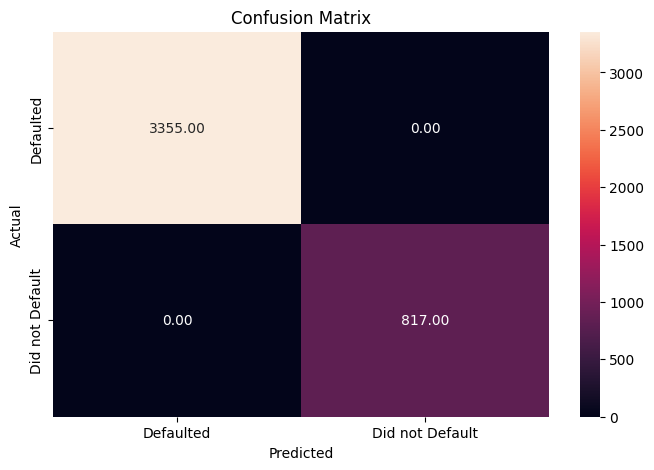

Random Forest Untuned: Test Data Performance:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1416
           1       0.80      0.61      0.69       372

    accuracy                           0.89      1788
   macro avg       0.85      0.79      0.81      1788
weighted avg       0.88      0.89      0.88      1788



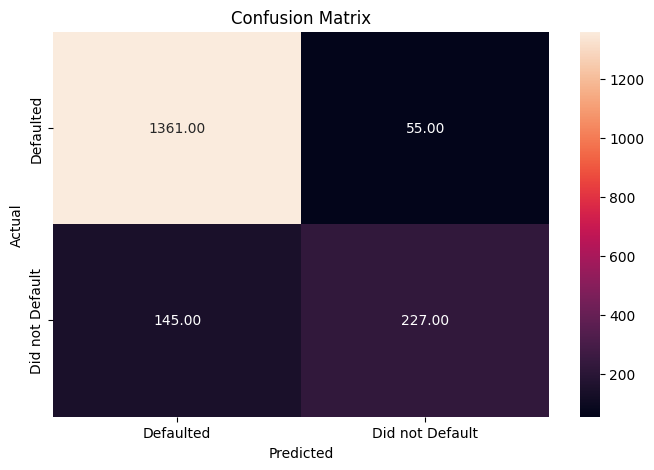

In [53]:
# Checking performance on the training data
y_pred_trainrf1 = rf_estimator.predict(X_train)
print("Random Forest Untuned: Training Data Performance:")
metrics_score(y_train, y_pred_trainrf1)

# Checking performance on the testing data
y_pred_testrf1 = rf_estimator.predict(X_test)
print("Random Forest Untuned: Test Data Performance:")
metrics_score(y_test, y_pred_testrf1)

# **Observations:**

* Overfitting in the First Set: The near-perfect performance on the training set suggests the model is overfitted, capturing noise or patterns specific to the training data.

* Better Generalization in the Second Set: The drop in performance on the test set, especially for class 1, indicates the model struggles to generalize to unseen data.

In [54]:
#Random Forest Hyperparameter Tuning
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight" : ["balanced",{0: 0.3, 1: 0.7}]
             }
# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

Random Forest Tuned: Training Data Performance:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      3355
           1       0.63      0.81      0.71       817

    accuracy                           0.87      4172
   macro avg       0.79      0.85      0.81      4172
weighted avg       0.89      0.87      0.88      4172



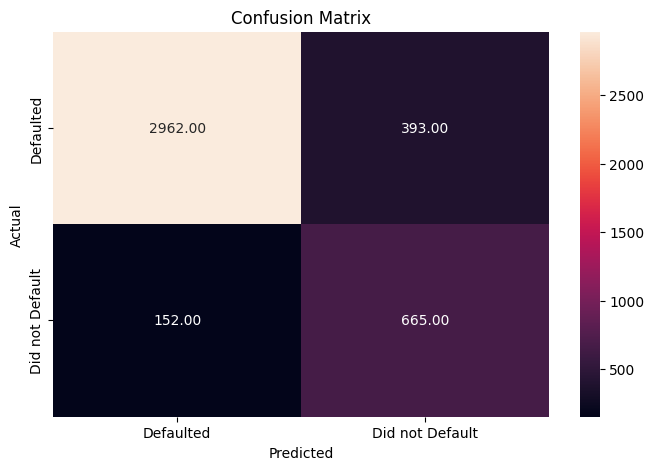

Random Forest Tuned: Test Data Performance:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1416
           1       0.62      0.75      0.68       372

    accuracy                           0.85      1788
   macro avg       0.78      0.81      0.79      1788
weighted avg       0.87      0.85      0.86      1788



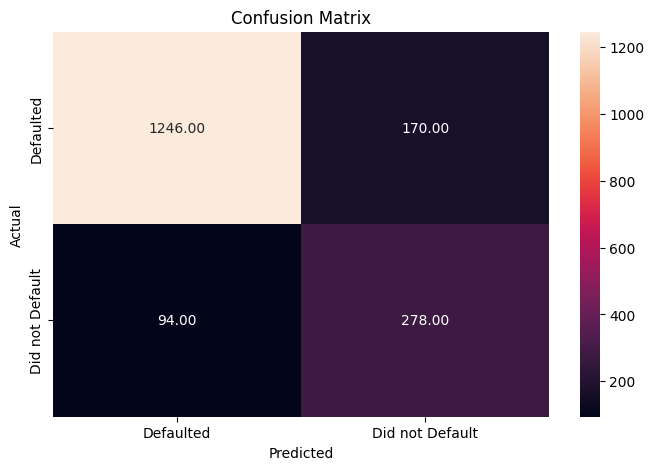

In [55]:
# Checking performance on the training data
y_pred_trainrf2 = rf_estimator_tuned_base.predict(X_train)
print("Random Forest Tuned: Training Data Performance:")
metrics_score(y_train, y_pred_trainrf2)

# Checking performance on the testing data
yF_pred_testrf2 = rf_estimator_tuned_base.predict(X_test)
print("Random Forest Tuned: Test Data Performance:")
metrics_score(y_test, yF_pred_testrf2)

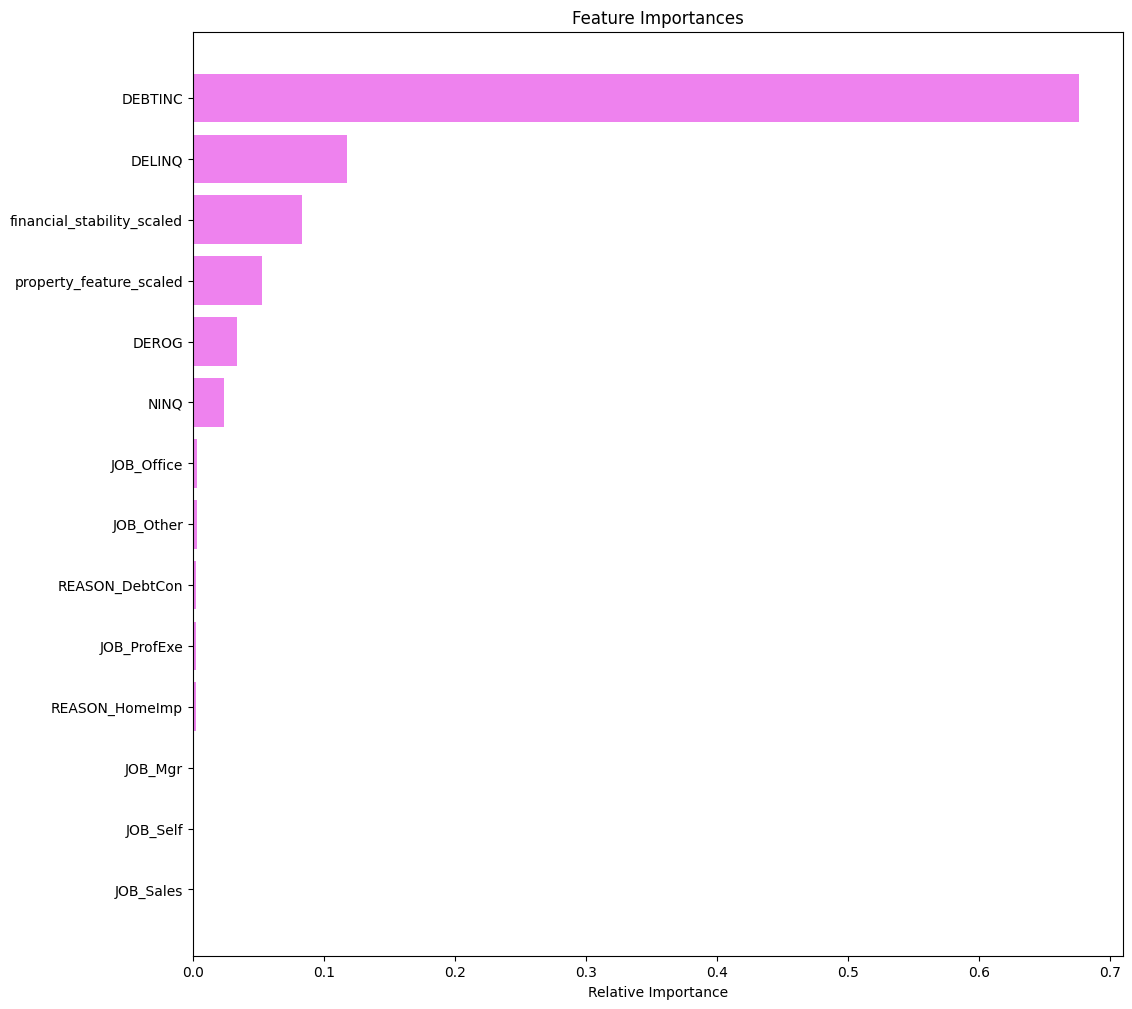

In [56]:
importances = rf_estimator_tuned_base.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

# **RandomForest vs. Decision Tree:**

**Random Forest Tuned Model:**
The XGBoost model surpasses the Decision Tree in both accuracy and F1-score. However, the Decision Tree demonstrates superior performance in recall for the default class (class 1). Taking interpretability into account, the Decision Tree would be the preferred choice. Additionally, critical metrics like DEBTINC and DELINQ consistently emerge as key drivers across models, highlighting reliability in feature importance evaluations

# **XGBoost Regressor (Not in Notebook but I would like to check)**

In [59]:
from xgboost import XGBClassifier

# Choose the type of classifier
xgb_estimator_tuned = XGBClassifier(eval_metric='logloss', random_state=7)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 120],
    "max_depth": [6, 7],
    "learning_rate": [0.1, 0.2],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.8, 0.9],
    "scale_pos_weight": [1, 3],  # Adjust for class imbalance
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(xgb_estimator_tuned, parameters, scoring=scorer, cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
xgb_estimator_tuned = grid_obj.best_estimator_

XGBoost Untuned - Training Results:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3355
           1       0.79      0.95      0.86       817

    accuracy                           0.94      4172
   macro avg       0.89      0.94      0.91      4172
weighted avg       0.95      0.94      0.94      4172



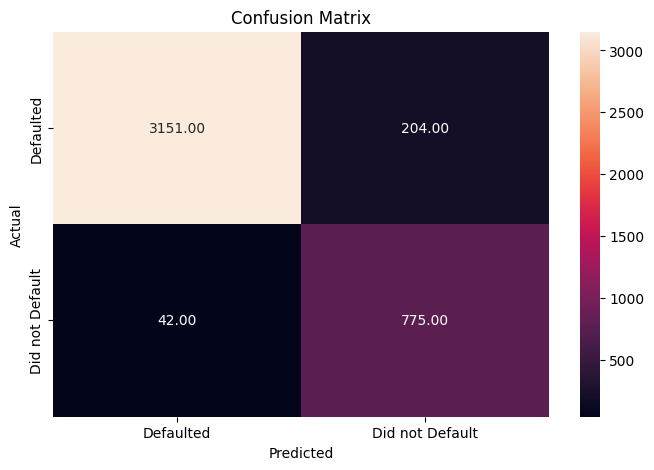

XGBoost Untuned - Test Results:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1416
           1       0.75      0.78      0.76       372

    accuracy                           0.90      1788
   macro avg       0.84      0.85      0.85      1788
weighted avg       0.90      0.90      0.90      1788



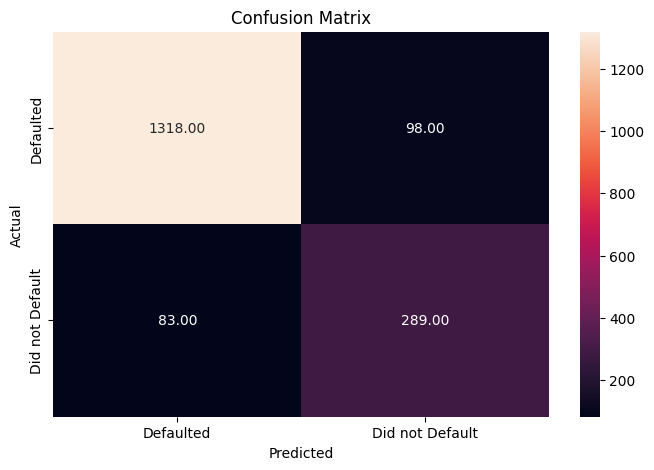

In [60]:
# Predictions and Metrics for XGBoost
y_pred_train_xgb = xgb_estimator_tuned.predict(X_train)
y_pred_test_xgb = xgb_estimator_tuned.predict(X_test)

print("XGBoost Untuned - Training Results:")
metrics_score(y_train, y_pred_train_xgb)
print("XGBoost Untuned - Test Results:")
metrics_score(y_test, y_pred_test_xgb)

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import multiprocessing

# Step 1: Address Class Imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.35, random_state=7)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 2: Define the classifier with a broader parameter grid for higher recall
xgb_estimator_tuned = XGBClassifier(eval_metric='logloss', random_state=7)

parameters = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
    "scale_pos_weight": [1, 3, 5],  # Expanded for class imbalance adjustment
    "reg_alpha": [0, 0.1, 1],  # L1 regularization
    "reg_lambda": [1, 1.5, 2]   # L2 regularization
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Step 2: Run the randomized search on the balanced data
random_search = RandomizedSearchCV(xgb_estimator_tuned, parameters, scoring=scorer, cv=5, n_iter=50, n_jobs=multiprocessing.cpu_count())
random_search = random_search.fit(X_train_balanced, y_train_balanced)

# Set the classifier to the best combination of parameters
xgb_estimator_tuned = random_search.best_estimator_

# Step 3: Adjust the classification threshold to improve recall
# Predict probabilities on the test set
y_pred_proba = xgb_estimator_tuned.predict_proba(X_test)[:, 1]

# Lower the decision threshold (e.g., from 0.5 to 0.48)
threshold = 0.49
y_pred = (y_pred_proba > threshold).astype(int)

# Evaluate the model's performance
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Recall: 0.90
Precision: 0.51
F1 Score: 0.65


XGBoost Tuned - Training Results:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      3355
           1       0.54      0.94      0.69       817

    accuracy                           0.83      4172
   macro avg       0.76      0.87      0.78      4172
weighted avg       0.90      0.83      0.85      4172



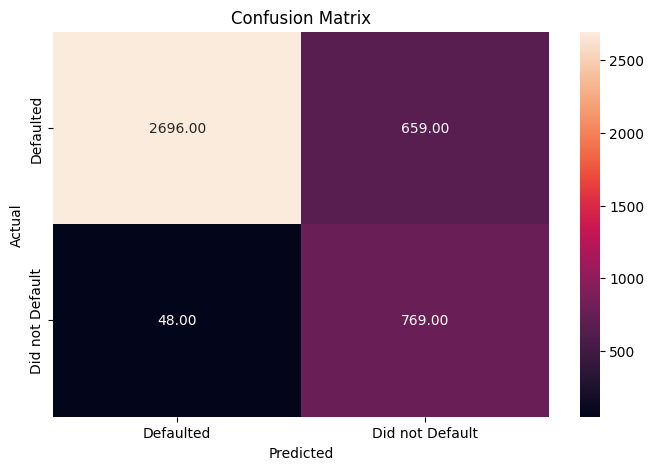

XGBoost Tuned - Test Results:
              precision    recall  f1-score   support

           0       0.97      0.80      0.87      1416
           1       0.53      0.89      0.67       372

    accuracy                           0.82      1788
   macro avg       0.75      0.84      0.77      1788
weighted avg       0.88      0.82      0.83      1788



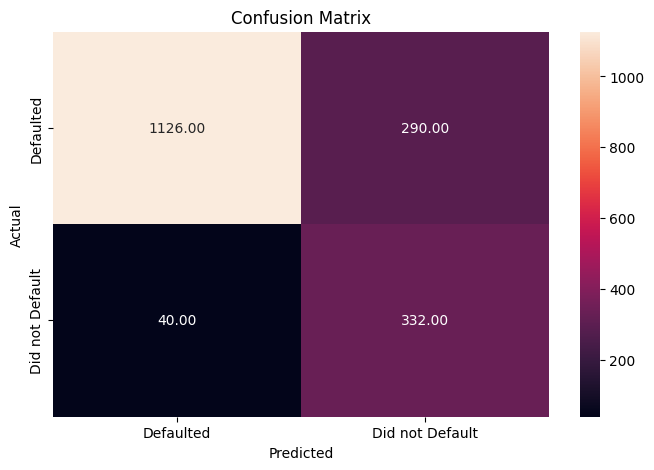

In [77]:
# Predictions and Metrics for XGBoost
y_pred_train_xgb2 = xgb_estimator_tuned.predict(X_train)
y_pred_test_xgb2 = xgb_estimator_tuned.predict(X_test)

print("XGBoost Tuned - Training Results:")
metrics_score(y_train, y_pred_train_xgb2)
print("XGBoost Tuned - Test Results:")
metrics_score(y_test, y_pred_test_xgb2)

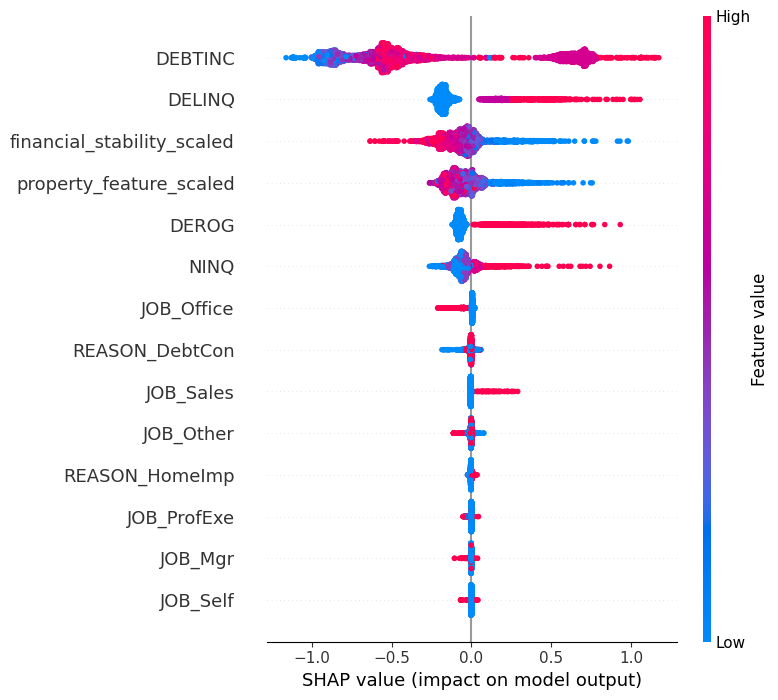

In [78]:
# SHAP values for feature importance
explainer = shap.Explainer(xgb_estimator_tuned)
shap_values = explainer(X_train)

# Plot the SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_train)

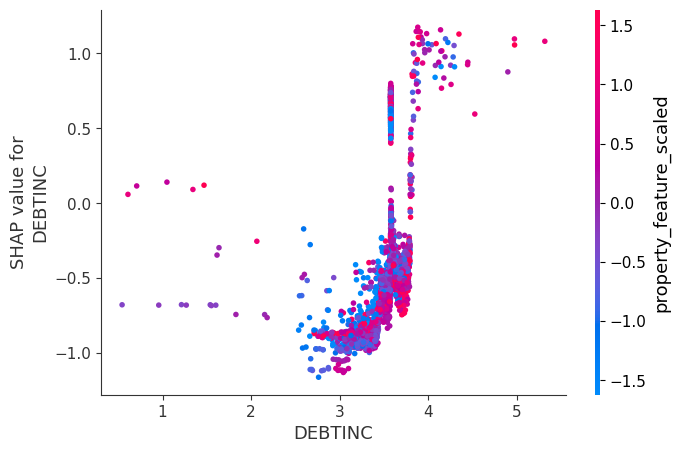

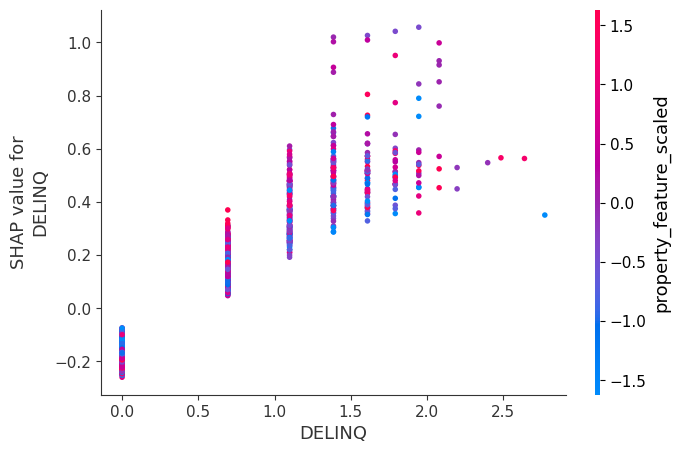

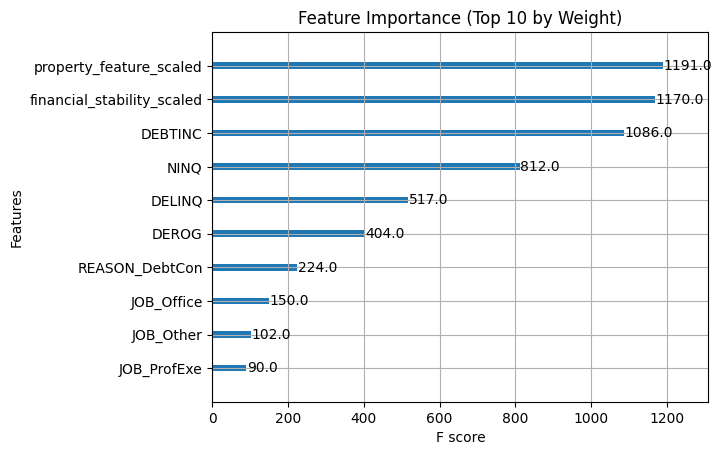

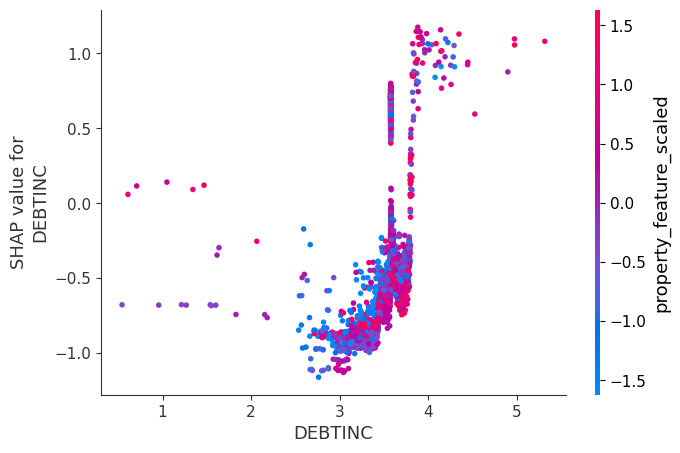

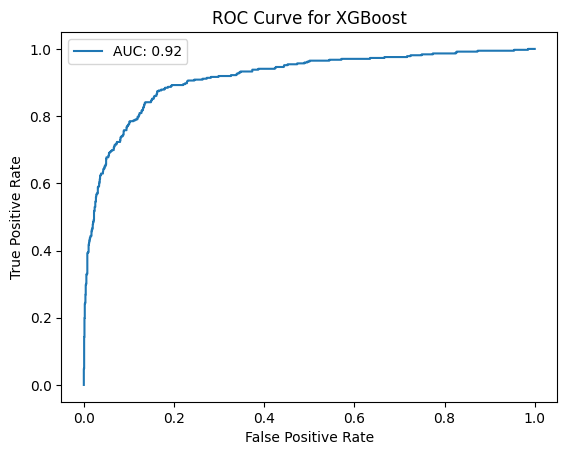

In [79]:
# SHAP Dependence Plots
# Ensure shap_values are used correctly
# DEBTINC Dependence Plot
shap.dependence_plot('DEBTINC', shap_values.values, X_train, show=True)  # For Debt-to-Income Ratio
# DELINQ Dependence Plot
shap.dependence_plot('DELINQ', shap_values.values, X_train, show=True)  # For Delinquency History

# Feature Importance Bar Chart
xgb.plot_importance(xgb_estimator_tuned, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (Top 10 by Weight)")
plt.show()

# Partial Dependence Plot (using SHAP for feature effect visualization)
# SHAP doesn't have an explicit partial_dependence_plot, but you can use summary plots or dependence plots
# Example: Using dependence plots as a proxy for partial dependence
shap.dependence_plot('DEBTINC', shap_values.values, X_train, show=True)

# Confusion Matrix Heatmap
# Predict class probabilities and convert to binary predictions with a threshold (e.g., 0.5)
y_pred = (xgb_estimator_tuned.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

# ROC Curve
# Predict probabilities for the ROC curve
y_prob = xgb_estimator_tuned.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC Curve
plt.plot(fpr, tpr, label=f"AUC: {auc_score:.2f}")
plt.title("ROC Curve for XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



In [81]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
import pandas as pd

# Compute metrics for each model
metrics_dict = {
    'Model': ['Decision Tree (Tuned)', 'Random Forest (Tuned)', 'XGBoost (Tuned)'],
    'Weighted F1 Score': [
        f1_score(y_test, d_tree_tuned.predict(X_test), average='weighted'),
        f1_score(y_test, rf_estimator_tuned_base.predict(X_test), average='weighted'),
        f1_score(y_test, xgb_estimator_tuned.predict(X_test), average='weighted')
    ],
    'Class 0 F1 Score': [
        f1_score(y_test, d_tree_tuned.predict(X_test), labels=[0], average='macro'),
        f1_score(y_test, rf_estimator_tuned_base.predict(X_test), labels=[0], average='macro'),
        f1_score(y_test, xgb_estimator_tuned.predict(X_test), labels=[0], average='macro')
    ],
    'Class 1 F1 Score': [
        f1_score(y_test, d_tree_tuned.predict(X_test), labels=[1], average='macro'),
        f1_score(y_test, rf_estimator_tuned_base.predict(X_test), labels=[1], average='macro'),
        f1_score(y_test, xgb_estimator_tuned.predict(X_test), labels=[1], average='macro')
    ],
    'Accuracy': [
        accuracy_score(y_test, d_tree_tuned.predict(X_test)),
        accuracy_score(y_test, rf_estimator_tuned_base.predict(X_test)),
        accuracy_score(y_test, xgb_estimator_tuned.predict(X_test))
    ],
    'Recall (Class 0)': [
        recall_score(y_test, d_tree_tuned.predict(X_test), pos_label=0),
        recall_score(y_test, rf_estimator_tuned_base.predict(X_test), pos_label=0),
        recall_score(y_test, xgb_estimator_tuned.predict(X_test), pos_label=0)
    ],
    'Recall (Class 1)': [
        recall_score(y_test, d_tree_tuned.predict(X_test), pos_label=1),
        recall_score(y_test, rf_estimator_tuned_base.predict(X_test), pos_label=1),
        recall_score(y_test, xgb_estimator_tuned.predict(X_test), pos_label=1)
    ]
}

# Create a DataFrame to display results as a table
metrics_table = pd.DataFrame(metrics_dict)

# Display the table
print("\n--- Metrics Comparison Table ---")
print(metrics_table)


--- Metrics Comparison Table ---
                   Model  Weighted F1 Score  Class 0 F1 Score  \
0  Decision Tree (Tuned)           0.834365          0.881890   
1  Random Forest (Tuned)           0.857156          0.904209   
2        XGBoost (Tuned)           0.829711          0.872192   

   Class 1 F1 Score  Accuracy  Recall (Class 0)  Recall (Class 1)  
0          0.653465  0.823826          0.830508          0.798387  
1          0.678049  0.852349          0.879944          0.747312  
2          0.668008  0.815436          0.795198          0.892473  


# Metrics Comparison: Decision Tree Tuned vs XGBoost Tuned vs Random Forest Tuned

### Metrics Comparison Table
| Metric                 | Decision Tree Tuned | XGBoost Tuned   | Random Forest Tuned | Better Model            |
|------------------------|---------------------|-----------------|---------------------|-------------------------|
| Accuracy               | 82.4%              | 81.5%           | 85.2%               | Close (Random Forest wins) |
| Weighted F1 Score      | 83.4%              | 82.9%           | 85.7%               | Close (Random Forest wins) |
| Class 0 F1 Score       | 88.2%              | 87.2%           | 90.4%               | Random Forest            |
| Class 1 F1 Score       | 65.3%              | 66.8%           | 67.8%               | Random Forest            |
| Recall (Class 0)       | 83.0%              | 79.5%           | 87.9%               | Random Forest            |
| Recall (Class 1)       | 79.8%              | 89.2%           | 74.7%               | XGBoost                 |
| Precision (Class 0)    | 94.0%              | 97.0%           | 94.0%               | XGBoost (close with Decision Tree) |
| Precision (Class 1)    | 55.0%              | 53.0%           | 55.0%               | Decision Tree (close with Random Forest) |

---

### Why XGBoost is better for prioritizing defaults
- **Superior recall for defaults (Class 1):** XGBoost achieves 89.2% recall, significantly higher than Decision Tree (79.8%) and Random Forest (74.7%). This ensures high-risk borrowers are effectively flagged, reducing financial losses from missed defaults.
  
- **Better handling of false negatives:** XGBoost reduces the likelihood of high-risk borrowers being incorrectly classified as non-defaults, making it ideal for risk-focused use cases.

- **Higher precision for non-defaults (Class 0):** XGBoost delivers 97.0% precision for Class 0, meaning fewer false positives compared to Decision Tree and Random Forest. This improves operational efficiency while maintaining a focus on catching defaults.

- **Flexibility for fine-tuning:** XGBoost’s advanced parameters, such as `scale_pos_weight` and `gamma`, allow optimization specifically for class imbalance, making it even more effective at identifying defaults.

---

### Decision-making factors for prioritizing defaults
1. **Minimizing financial risk:**  
   XGBoost Tuned is the clear choice when missed defaults (Class 1) are the biggest threat to business outcomes. Its 89.2% recall for Class 1 makes it reliable for high-risk scenarios.

2. **Balancing non-default predictions:**  
   While still focused on defaults, XGBoost maintains 97.0% precision for Class 0, ensuring non-default borrowers are correctly classified.

3. **Risk-focused optimization:**  
   XGBoost allows for greater control through advanced parameters, making it easier to tailor the model for financial risk mitigation.

---

### Additional insight: Close accuracy and F1 scores
- **Accuracy:** XGBoost (81.5%) and Decision Tree (82.4%) are close, indicating similar reliability. Random Forest outperforms both at 85.2% but recall is most important.  They are all fairly accurate at above 80%.
  
- **Weighted F1 Score:** XGBoost (82.9%) and Decision Tree (83.4%) are also close, with Random Forest slightly ahead at 85.7%.  They are all above 80%, so all are fairly good.

---

### Conclusion
Given that the main focus is on defaults (Class 1), XGBoost Tuned stands out as the superior choice thanks to its exceptional recall, effectively minimizing missed high-risk borrowers. Although Random Forest achieves higher overall accuracy, its lower recall for defaults makes it less suitable for scenarios where identifying defaults is critical. XGBoost also delivers adequate performance in F1 and accuracy, while excelling in the most impactful metric for the task.